# Assignment 2

 Name : Sampada Kasture

 NUID: 002743809

# AutoML

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.

For the moment you will assume the data is good. In future assignments, you will check your data, fix data issues and do some feature engineering.

#  **Abstract**




People have gathered sensory evidence on fine wine in terms of a few traits over time. In this project, we will use that dataset to train machine learning models and produce new predictions on a new collection of data to assist users in determining the quality of wine using the given set of qualities. This research will greatly benefit the wine business and wine testers.


Variable Description :

1. Fixed Acidity - The amount of nonvolatile acids in a wine.


2. Volatile Acidity - The amount of volatile acids in the wine, such as acetic acid.


3. Citric Acid - The amount of citric acid in wine that gives it a sour taste.


4. Residual Sugar - The amount of sugar left in the wine after fermentation.


5. Chlorides - the  salts found in wine.


6. Free Sulphur Dioxide - The amount of free SO2 that protects wine from oxidizing.


7. Total Sulphur Dioxide - Total Amount of SO2 in wine, both free and bound.


8. Density - Wine density


9. pH - Wine's pH value


10. Sulphates - The amount of sulphates present in wine that is utilized as a wine additive.


11. Alcohol - The amount of alcohol in a glass of wine.


12. Quality - Output variable ranging from 0 to 10.


# Dataset
What are the data types? (Only numeric and categorical)
The data set consists of :

12 diagnostic measures to predict diabetes i.e. 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality' - The independent variables

Wine type - The dependent variable

The category of Wine type ranges from 0(No) to 1(Yes) There are a total of 6497 observations

Answer the following questions:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

In [342]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [343]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(rc={"figure.figsize": (16, 8)})

In [344]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [345]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

0


In [346]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:13176..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpash_k1xk
  JVM stdout: /tmp/tmpash_k1xk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpash_k1xk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:13176
Connecting to H2O server at http://127.0.0.1:13176 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_rbktyt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Exploring Data Analysis (EDA)

In [347]:
#reading the dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/sampada-kasture/Data-Science/main/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [348]:
df = df.rename(columns={'type': 'is_type','fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid' ,'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfurdioxide', 'total sulfur dioxide': 'total_sulfurdioxide'})
df.head()

,is_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfurdioxide,total_sulfurdioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   is_type              6497 non-null   object 
 1   fixed_acidity        6487 non-null   float64
 2   volatile_acidity     6489 non-null   float64
 3   citric_acid          6494 non-null   float64
 4   residual_sugar       6495 non-null   float64
 5   chlorides            6495 non-null   float64
 6   free_sulfurdioxide   6497 non-null   float64
 7   total_sulfurdioxide  6497 non-null   float64
 8   density              6497 non-null   float64
 9   pH                   6488 non-null   float64
 10  sulphates            6493 non-null   float64
 11  alcohol              6497 non-null   float64
 12  quality              6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [350]:
df.isnull().sum() #checking for null values in the dataset

is_type                 0
fixed_acidity          10
volatile_acidity        8
citric_acid             3
residual_sugar          2
chlorides               2
free_sulfurdioxide      0
total_sulfurdioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

Here we found null values in few coloumns so we will impute null values with mean/ median method

In [351]:
#imputing null values with mean/median
df['fixed_acidity'].fillna(df['fixed_acidity'].mean(), inplace=True)
df['volatile_acidity'].fillna(df['volatile_acidity'].mean(), inplace=True)
df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)
df['citric_acid'].fillna(df['citric_acid'].mean(), inplace=True)
df['residual_sugar'].fillna(df['residual_sugar'].mean(), inplace=True)
df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
df['pH'].fillna(df['pH'].mean(), inplace=True)

In [352]:
#checking missing data after imputing null values wiht mean/median
df.isnull().sum()

is_type                0
fixed_acidity          0
volatile_acidity       0
citric_acid            0
residual_sugar         0
chlorides              0
free_sulfurdioxide     0
total_sulfurdioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

Successfully imputed null values

In [353]:
df.shape

(6497, 13)

Checking the shape on the dataframe, we have 6497 samples of data with 13 predictors

In [354]:
df.head()

,is_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfurdioxide,total_sulfurdioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [355]:
df['is_type'] = df['is_type'].map({'white':1,'red':0})
df['is_type']

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: is_type, Length: 6497, dtype: int64

Name of all predictors and result

In [356]:
df.describe()  # Statistical description of our dataset

,is_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfurdioxide,total_sulfurdioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,0.430779,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


This table shows summary statistics for a dataset with 6497 observations and 13 variables.

The variables are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality.

The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.


In [357]:
# sns.heatmap(
#     df.corr(), annot=True, cmap="Blues"
# )  # Heatmap showing correlation between the attributes.

# **Correlation Analysis**

Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light maroon) to high (e.g. dark maroon).

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

From the Above Matrix we can conclude a few things

* Total Sulphur Dioxide and Free Sulphur Dioxide is highly correlated
* pH and fixed_acidity is highly correlated

In [358]:
# All attributes are plotted against each other to see the pattern of distribution
# sns.pairplot(df)

# **Interpreting PairPlot**


* A pair plot is a graphical representation of pairwise relationships between variables in a dataset. It displays scatter plots for each pair of variables

* Relationship between variables: The scatter plots show the relationship between pairs of variables. If two variables are highly correlated, the scatter plot will show a strong linear relationship between them. If there is no correlation between the variables, the scatter plot will show a random distribution of points. The pair plot can help identify variables that have a strong positive or negative correlation.

* Distribution of variables: The histograms show the distribution of each variable. If a variable has a normal distribution, the histogram will be bell-shaped. If a variable is skewed, the histogram will be asymmetric. The pair plot can help identify variables that have non-normal distributions or outliers.

* Outliers: The scatter plots can reveal any outliers that may exist in the dataset. Outliers are data points that are far from the other data points and can have a significant impact on statistical models.

* Patterns and trends: By examining the scatter plots, you can identify patterns and trends in the data. For example, you may see that the relationship between two variables changes over time, or that there is a nonlinear relationship between two variables.

* Potential predictors: By examining the scatter plots, you can identify variables that may be potential predictors for a statistical model. Variables that have a strong correlation with the target variable may be good predictors for the model.

In [359]:
# import statsmodels.api as sm
# for col in df.columns:
#     sm.qqplot( df[col], line='s')
#     plt.title('Q-Q plot of ' + col)
#     plt.show()

In [360]:
df = h2o.H2OFrame(
    df
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [361]:
df.types

{'is_type': 'int',
 'fixed_acidity': 'real',
 'volatile_acidity': 'real',
 'citric_acid': 'real',
 'residual_sugar': 'real',
 'chlorides': 'real',
 'free_sulfurdioxide': 'real',
 'total_sulfurdioxide': 'real',
 'density': 'real',
 'pH': 'real',
 'sulphates': 'real',
 'alcohol': 'real',
 'quality': 'int'}

 Datatype of all attributes, here the result ("quality") is int hence it can be solved using the regression.

In [362]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [363]:
print(df_train.shape)
print(df_test.shape)

(5203, 13)
(1294, 13)


In [364]:
df_train.head()

is_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfurdioxide,total_sulfurdioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
1,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
1,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
1,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
1,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
1,6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
1,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,6


In [365]:
X = df.columns
print(X)

['is_type', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfurdioxide', 'total_sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [366]:
# Set target and predictor variables
y = "is_type"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfurdioxide', 'total_sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [367]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [368]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |
01:45:21.486: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████████████
01:46:08.872: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███████████
01:46:50.518: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████████
01:47:23.371: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
01:47:24.707

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/12
# GBM base models (used / total),2/5
# XGBoost base models (used / total),2/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


We can see above that the best model, is slighly overfitting on the dataset as there is a significant difference between the metrics on training and validation dataset

##Understanding the Parameters
* Mean Squared Error (MSE): The MSE measures the average squared difference
between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

* Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models. The RMSE is a measure of how well the model is able to predict the actual values.

* Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

* Root Mean Squared Logarithmic Error (RMSLE): The RMSLE is a variation of the RMSE that is used for regression models where the target variable has a wide range of values. It is calculated by taking the square root of the average of the squared differences between the logarithm of the predicted and actual values.

* Mean Residual Deviance: The Mean Residual Deviance is a measure of the goodness of fit for a regression model. It measures the average difference between the predicted and actual values, normalized by the degrees of freedom of the model.

* R-squared (R^2): The R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. A value of 1 means that the model explains all the variability in the data, while a value of 0 means that the model explains none of the variability.

* Null Degrees of Freedom: The Null Degrees of Freedom is the number of observations in the dataset minus 1. It represents the number of observations in the dataset that are free to vary, given the number of parameters in the model.

* Residual Degrees of Freedom: The Residual Degrees of Freedom is the number of observations in the dataset minus the number of parameters in the model. It represents the number of observations in the dataset that are free to vary after taking into account the number of parameters in the model.

* Null Deviance: The Null Deviance is the deviance of the null model, which is the model with no independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

* Residual Deviance: The Residual Deviance is the deviance of the model after accounting for the independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

* Akaike Information Criterion (AIC): The AIC is a measure of the quality of a model that takes into account the complexity of the model. It is calculated as the negative log-likelihood of the model plus twice the number of parameters in the model. The AIC can be used to compare the quality of different models, with lower values indicating better quality.

In [369]:
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                     rmse         mse        mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20231103_14521     0.0681151  0.00463966  0.0226637  0.0489827                0.00463966
StackedEnsemble_BestOfFamily_3_AutoML_1_20231103_14521  0.0683828  0.00467621  0.0228354  0.0491031                0.00467621
StackedEnsemble_BestOfFamily_2_AutoML_1_20231103_14521  0.0695717  0.00484022  0.0234333  0.0500224                0.00484022
StackedEnsemble_AllModels_1_AutoML_1_20231103_14521     0.069615   0.00484625  0.0235819  0.0501018                0.00484625
GBM_5_AutoML_1_20231103_14521                           0.072101   0.00519855  0.0215307  0.0512344                0.00519855
DRF_1_AutoML_1_20231103_14521                           0.072885   0.00531223  0.0195201  0.0523866                0.00531223
GBM_4_AutoML_1_20231103_14521                           0.0736049  0.00541768  0.0259108  0.0534088                0.0

The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the best performing model is

* StackedEnsemble_AllModels_3_AutoML_1_20231102_231944 with an rmse score of 0.600847.
* The second-best model is StackedEnsemble_BestOfFamily_4_AutoML_1_20231102_231944 with an rmse score of 0.600972.
The models are then listed in descending order based on their rmse scores.

In [370]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_2_AutoML_1_20231103_14521': 0,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20231103_14521': 1,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20231103_14521': 2,
 'StackedEnsemble_AllModels_1_AutoML_1_20231103_14521': 3,
 'GBM_5_AutoML_1_20231103_14521': 4,
 'GLM_1_AutoML_1_20231103_14521': 18}

In [371]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

4


In [372]:
best_model.algo

'gbm'

In [373]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

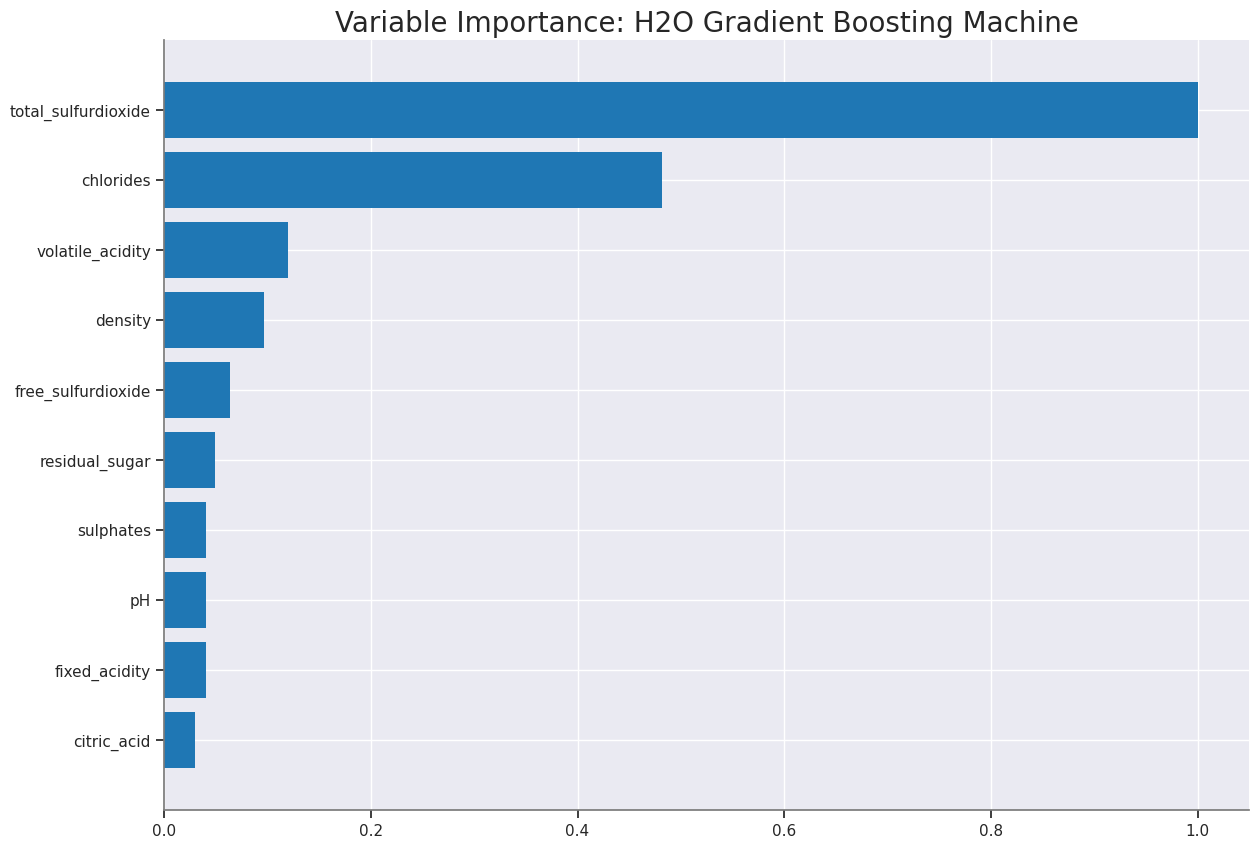

<Figure size 1600x800 with 0 Axes>

In [374]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()


The above graph is a variable Importance Graph on the H20's Distributed Random Forest Model

* We can Interpret that Alcohol is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)
* Volatile acidity is 0.55 (Think as if it is 55% Important than Alcohol was)
And So On..

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-375-0cab54a0793b>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


18
glm


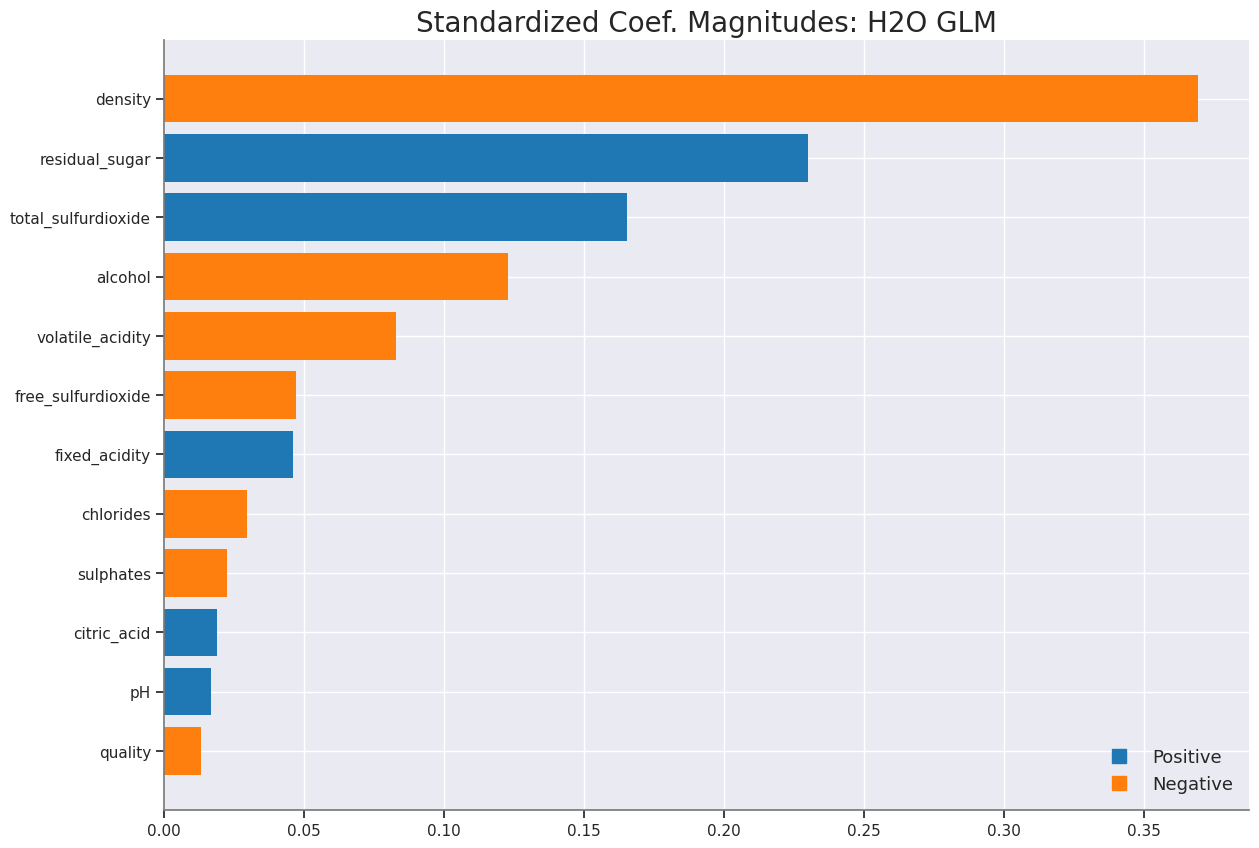

In [375]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

Standardized coefficient magnitudes (sometimes referred to as standardized coefficients or beta coefficients) are a measure of the importance of each input variable in a predictive model, after standardizing all variables to have a mean of zero and a standard deviation of one. The values of standardized coefficient magnitudes can range from negative infinity to positive infinity, but they are typically expressed as a percentage.

The values on standardized coefficient magnitudes represent the relative importance of each input variable in the model, after taking into account the scale of the variable. A higher magnitude value indicates that the variable has a stronger impact on the outcome variable, while a lower value indicates a weaker impact.

In [376]:
print(best_model.rmse(train=True))

0.026442213097941827


In [377]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [378]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.008376122635532472,
 'rmse': 0.09152115949621963,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [379]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [380]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

       predict
0     0.968107
1     1.001255
2     0.967576
3     1.005187
4     0.991266
...        ...
1289  0.000705
1290 -0.010718
1291  0.009383
1292  0.232479
1293 -0.007827

[1294 rows x 1 columns]


In [381]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

,is_type
0,1
1,1
2,1
3,1
4,1
...,...
1289,0
1290,0
1291,0
1292,0


In [382]:
print(X)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfurdioxide', 'total_sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


#Regularization
In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

* Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization ability.

* Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

* Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By setting some coefficients to zero, Lasso can effectively remove irrelevant variables from the model, which can lead to a simpler and more interpretable model.

* The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.

In [383]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

wine_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
wine_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
wine_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
wine_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

This code is creating two generalized linear regression models using the H2O machine learning platform with different regularization methods: Ridge and Lasso.

* The first model, "wine_glm_regularization_ridge," is using Ridge regularization. The "family" argument is set to "gaussian," which means that the response variable is continuous and the model is using a normal (Gaussian) error distribution. The "alpha" argument is set to 0, which means that the model is using Ridge regularization. The "nfolds" argument is set to 5, which means that the model is using 5-fold cross-validation to evaluate the performance of the model.
* The second model, "wine_glm_regularization_lasso," is using Lasso regularization. The "family" and "nfolds" arguments are the same as in the Ridge model, but the "alpha" argument is set to 1, which means that the model is using Lasso regularization.
* This code creates a generalized linear regression model using H2O with the option of performing lambda search for L1 and L2 regularization.

In [384]:
wine_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,None,12,12,1,py_517_sid_927b
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1145027,0.0038671,0.1085404,0.1134639,0.1155570,0.1189586,0.1159934
mean_residual_deviance,0.0268829,0.0044428,0.0346484,0.0243131,0.0238169,0.0262539,0.0253822
mse,0.0268829,0.0044428,0.0346484,0.0243131,0.0238169,0.0262539,0.0253822
null_deviance,193.3457,4.85277,186.04485,194.00882,192.6322,194.47914,199.56355
r2,0.8542198,0.0307017,0.8011963,0.8728020,0.8742042,0.8540420,0.8688544
residual_deviance,28.035797,5.1750555,36.831238,24.653461,24.22182,28.35422,26.118244
rmse,0.1635486,0.0129782,0.1861408,0.1559265,0.1543274,0.1620306,0.1593178
rmsle,0.1192472,0.0035331,nan,0.1170241,0.1241237,0.1195338,0.1163072


# Ridge Regularization

In [385]:
wine_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 3.022E-4 ),12,12,1,py_517_sid_927b
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1150431,0.0023224,0.1134230,0.1144527,0.1147803,0.1190612,0.1134982
mean_residual_deviance,0.0273651,0.0055454,0.0370150,0.0243949,0.0239431,0.0271587,0.0243138
mse,0.0273651,0.0055454,0.0370150,0.0243949,0.0239431,0.0271587,0.0243138
null_deviance,193.26157,6.413999,193.84207,183.5895,199.40977,190.95573,198.51077
r2,0.8525164,0.0306211,0.7987126,0.8668301,0.8674501,0.8568460,0.8727431
residual_deviance,28.485239,5.9873962,39.01385,24.44372,26.409285,27.321634,25.237701
rmse,0.1648090,0.0159335,0.1923929,0.1561888,0.1547357,0.1647989,0.1559288
rmsle,0.1180478,0.0015395,nan,0.1164569,0.1192707,0.1194598,0.1170039


The regularization appears to have helped in reducing the cross-validation metrics.

* The mean squared error (Improved by 0.468%),
* root mean squared error (Improved by 0.234%),
* mean absolute error(Improved by 0.298%),
and root mean squared logarithmic error are all lower in the model with regularization compared to the model without regularization. Additionally, the residual deviance and AIC are also lower in the model with regularization. The R-squared value is slightly higher in the model with regularization, which means that the regularization helped the model to better generalize to new data.

# Lasso Regularization

In [386]:
wine_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 3.022E-4 ),12,12,1,py_517_sid_927b
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1151902,0.0031414,0.1122617,0.1161523,0.1156594,0.1121552,0.1197222
mean_residual_deviance,0.0273608,0.0082999,0.0238334,0.0244772,0.0233167,0.0230022,0.0421745
mse,0.0273608,0.0082999,0.0238334,0.0244772,0.0233167,0.0230022,0.0421745
null_deviance,193.32959,13.0660515,209.75055,205.252,184.85751,182.42326,184.36461
r2,0.8515633,0.0491248,0.8790262,0.8688164,0.8699088,0.8760512,0.7640139
residual_deviance,28.451101,8.528247,25.263426,26.92495,24.016226,22.611135,43.43977
rmse,0.1641120,0.0231319,0.1543808,0.156452,0.1526981,0.1516647,0.2053644
rmsle,0.1153807,0.0042205,0.1131822,0.1196835,0.1105951,0.1180619,nan


## Which Regularization Method Helps ?
* The Lasso regularization appears to have increased the MSE, RMSE, MAE, and RMSLE values compared to the non-regularized and Ridge regularized models, indicating worse performance. The R-squared value also decreased, indicating a worse fit to the data.

* So based on these metrics, it seems that Lasso did not help in this case and performed worse than Ridge. However, it's always a good practice to try multiple regularization techniques and compare their performance using different metrics, as the optimal regularization method can depend on the specific dataset and modeling task.

* Here, we can observe that after applying the ridge regularization, there is a slight improvement in the evaluation metrics on the cross validation data, hence it can be concluded that Ridge regularization helps us avoid the overfitting of model and improvements of metrics on the validation dataset.

In [387]:
lambda_search = wine_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [388]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698975905169_24


GLM Model: summary
    family    link      regularization                                lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 3.54E-4 )  nlambda = 100, lambda.max = 0.6043, lambda.min = 3.54E-4, lambda.1se = -1.0  12                            12                             81                      py_517_sid_927b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.02596450776864784
RMSE: 0.1611350606436968
MAE: 0.11430164387304055
RMSLE: NaN
Mean Residual Deviance: 0.02596450776864784
R^2: 0.8601691885114814
Null degrees of freedom: 5202
Residual degrees of freedom: 5190
Null deviance: 966.1199308090986
Residual deviance: 135.09333392027472
AIC: -4202.8074464240135

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train        alpha    iterations    training_rmse       training_deviance    training_mae         training_r2
---  -------------------  ----------  -----------  --------  ------------  --------------------  -------  ------------  ------------------  -------------------  -------------------  ------------------
     2023-11-03 01:49:11  0.000 sec   1            .6E0      1             0.18568516832772422   0.5
     2023-11-03 01:49:11  0.009 sec   2            .55E0     2             0.17340639038842967   0.5
     2023-11-03 01:49:11  0.011 sec   3            .5E0      3             0.15840671848554103   0.5
     2023-11-03 01:49:11  0.014 sec   4            .46E0     3             0.1446960133502396    0.5
     2023-11-03 01:49:11  0.017 sec   5            .42E0     3             0.13286272817418418   0.5
     2023-11-03 01:49:11  0.021 sec   6            .38E0     3             0.12268050214665507   0.5
     2023-11-03 01:49:11  0.024 sec   7            .35E0     4             0.1135497799482504    0.5
     2023-11-03 01:49:11  0.026 sec   8            .32E0     5             0.10386126374028892   0.5
     2023-11-03 01:49:11  0.027 sec   9            .29E0     6             0.09437642995629004   0.5
     2023-11-03 01:49:11  0.029 sec   10           .26E0     7             0.08606844837767152   0.5
---  ---                  ---         ---          ---       ---           ---                   ---      ---           ---                 ---                  ---                  ---
     2023-11-03 01:49:11  0.158 sec   72           .82E-3    13            0.025988239391580865  0.5
     2023-11-03 01:49:11  0.164 sec   73           .75E-3    13            0.02598327397044612   0.5
     2023-11-03 01:49:11  0.165 sec   74           .68E-3    13            0.02597926824717125   0.5
     2023-11-03 01:49:11  0.167 sec   75           .62E-3    13            0.02597578494998824   0.5
     2023-11-03 01:49:11  0.168 sec   76           .56E-3    13            0.025972990179401433  0.5
     2023-11-03 01:49:11  0.169 sec   77           .51E-3    13            0.02597086084735914   0.5
     2023-11-03 01:49:11  0.170 sec   78           .47E-3    13            0.025968893250153096  0.5
     2023-11-03 01:49:11  0.171 sec   79           .43E-3    13            0.025967015223339735  0.5
     2023-11-03 01:49:11  0.172 sec   80           .39E-3    13            0.0259657015848264    0.5
     2023-11-03 01:49:11  0.174 sec   81           .35E-3    13            0.02596450776864741   0.5      81            0.1611350606436968  0.02596450776864784  0.11430164387304055  0.8601691885114814
[81 r

In [389]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698975905169_24


GLM Model: summary
    family    link      regularization                                lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 3.54E-4 )  nlambda = 100, lambda.max = 0.6043, lambda.min = 3.54E-4, lambda.1se = -1.0  12                            12                             81                      py_517_sid_927b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.02596450776864784
RMSE: 0.1611350606436968
MAE: 0.11430164387304055
RMSLE: NaN
Mean Residual Deviance: 0.02596450776864784
R^2: 0.8601691885114814
Null degrees of freedom: 5202
Residual degrees of freedom: 5190
Null deviance: 966.1199308090986
Residual deviance: 135.09333392027472
AIC: -4202.8074464240135

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train        alpha    iterations    training_rmse       training_deviance    training_mae         training_r2
---  -------------------  ----------  -----------  --------  ------------  --------------------  -------  ------------  ------------------  -------------------  -------------------  ------------------
     2023-11-03 01:49:11  0.000 sec   1            .6E0      1             0.18568516832772422   0.5
     2023-11-03 01:49:11  0.009 sec   2            .55E0     2             0.17340639038842967   0.5
     2023-11-03 01:49:11  0.011 sec   3            .5E0      3             0.15840671848554103   0.5
     2023-11-03 01:49:11  0.014 sec   4            .46E0     3             0.1446960133502396    0.5
     2023-11-03 01:49:11  0.017 sec   5            .42E0     3             0.13286272817418418   0.5
     2023-11-03 01:49:11  0.021 sec   6            .38E0     3             0.12268050214665507   0.5
     2023-11-03 01:49:11  0.024 sec   7            .35E0     4             0.1135497799482504    0.5
     2023-11-03 01:49:11  0.026 sec   8            .32E0     5             0.10386126374028892   0.5
     2023-11-03 01:49:11  0.027 sec   9            .29E0     6             0.09437642995629004   0.5
     2023-11-03 01:49:11  0.029 sec   10           .26E0     7             0.08606844837767152   0.5
---  ---                  ---         ---          ---       ---           ---                   ---      ---           ---                 ---                  ---                  ---
     2023-11-03 01:49:11  0.158 sec   72           .82E-3    13            0.025988239391580865  0.5
     2023-11-03 01:49:11  0.164 sec   73           .75E-3    13            0.02598327397044612   0.5
     2023-11-03 01:49:11  0.165 sec   74           .68E-3    13            0.02597926824717125   0.5
     2023-11-03 01:49:11  0.167 sec   75           .62E-3    13            0.02597578494998824   0.5
     2023-11-03 01:49:11  0.168 sec   76           .56E-3    13            0.025972990179401433  0.5
     2023-11-03 01:49:11  0.169 sec   77           .51E-3    13            0.02597086084735914   0.5
     2023-11-03 01:49:11  0.170 sec   78           .47E-3    13            0.025968893250153096  0.5
     2023-11-03 01:49:11  0.171 sec   79           .43E-3    13            0.025967015223339735  0.5
     2023-11-03 01:49:11  0.172 sec   80           .39E-3    13            0.0259657015848264    0.5
     2023-11-03 01:49:11  0.174 sec   81           .35E-3    13            0.02596450776864741   0.5      81            0.1611350606436968  0.02596450776864784  0.11430164387304055  0.8601691885114814
[81 r

Above parameters are from a lambda search, which means that the model was trained on a range of different values of the regularization parameter lambda to find the value that minimized the selected loss function. Based on the reported metrics, it seems that the optimal value of lambda resulted in a slightly improved model compared to the non-regularized model. The MSE, RMSE, and MAE all decreased slightly, indicating that the model is making slightly more accurate predictions on the training data. The R^2 value, which measures how well the model fits the data, decreased slightly, which may indicate that the model is not overfitting the training data as much. Overall, the lambda search seems to have resulted in a slightly improved model.

* MSE improved from 0.4234393816333662 to 0.42185125944877285, or by 0.375%
* RMSE improved from 0.6507222000465069 to 0.6493051832461667, or by 0.218%
* MAE improved from 0.5049750807378458 to 0.5035142349852977, or by 0.290%
* RMSLE improved from 0.09927527847388463 to 0.09893003268921823, or by 0.348%
* R-squared improved from 0.358097238638058 to 0.3603008092769123, or by 0.616%
Here we can observe that regularization helps a bit in reducing the overfitting of our GLM model.

In [390]:
coeff_table = wine_glm._model_json["output"]["coefficients_table"]

In [391]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,133.760385,2.866394,46.665036,0.000000e+00,0.753604
1,fixed_acidity,0.046755,0.003759,12.437520,5.137470e-35,0.060748
2,volatile_acidity,-0.482474,0.019462,-24.790487,2.556102e-128,-0.079462
3,citric_acid,0.129371,0.019590,6.603795,4.408111e-11,0.018798
4,residual_sugar,0.052773,0.001261,41.862274,0.000000e+00,0.250394
5,chlorides,-0.787816,0.082849,-9.509034,2.864901e-21,-0.027314
6,free_sulfurdioxide,-0.002725,0.000185,-14.756151,2.644541e-48,-0.048553
7,total_sulfurdioxide,0.002893,0.000068,42.237722,0.000000e+00,0.164072
8,density,-133.579477,2.924625,-45.674053,0.000000e+00,-0.401152
9,pH,0.162545,0.022134,7.343494,2.403767e-13,0.025994


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20231103_14521,0.0825324,0.00681159,0.0261792,0.0590212,0.00681159,663,0.127506,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20231103_14521,0.0825362,0.00681223,0.0261094,0.0589892,0.00681223,526,0.061155,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20231103_14521,0.0836096,0.00699057,0.025308,0.0600908,0.00699057,516,0.064411,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20231103_14521,0.0836746,0.00700145,0.0253216,0.0601536,0.00700145,980,0.106034,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20231103_14521,0.0853081,0.00727747,0.0326263,0.0618491,0.00727747,1292,0.123333,StackedEnsemble
DRF_1_AutoML_1_20231103_14521,0.0855172,0.00731319,0.0221238,0.0603896,0.00731319,1133,0.017383,DRF
XRT_1_AutoML_1_20231103_14521,0.0858758,0.00737466,0.0225928,0.0610673,0.00737466,1332,0.017899,DRF
GBM_4_AutoML_1_20231103_14521,0.0868245,0.0075385,0.0281587,0.0628823,0.0075385,1192,0.051508,GBM
GBM_1_AutoML_1_20231103_14521,0.0871451,0.00759426,0.0395641,0.0645907,0.00759426,4285,0.116211,GBM
GBM_3_AutoML_1_20231103_14521,0.088764,0.00787905,0.028305,0.0637268,0.00787905,1949,0.041215,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

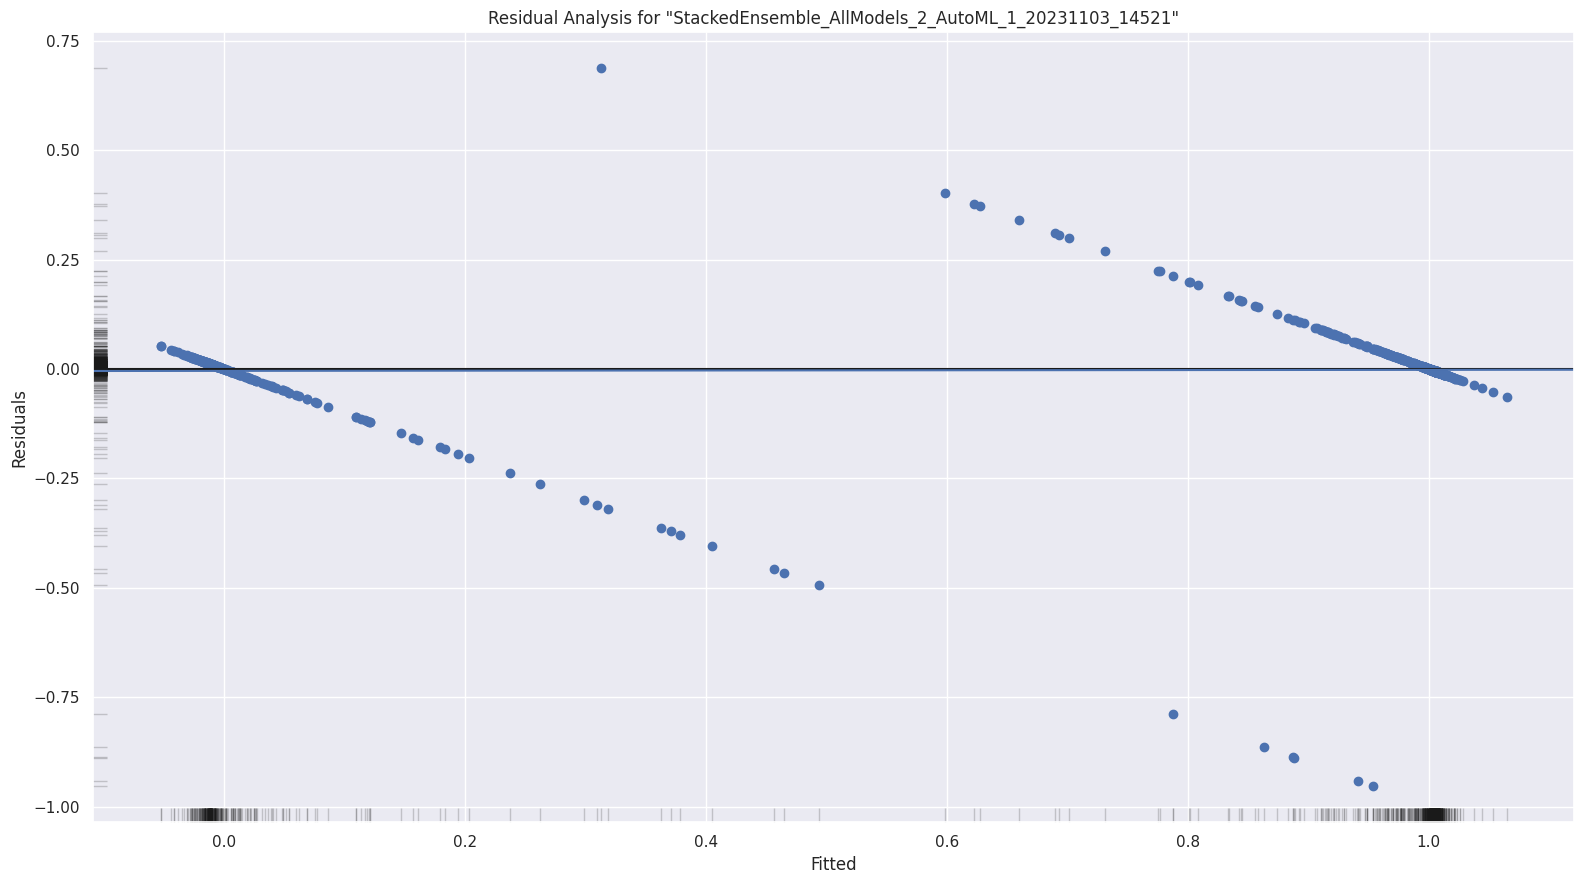

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

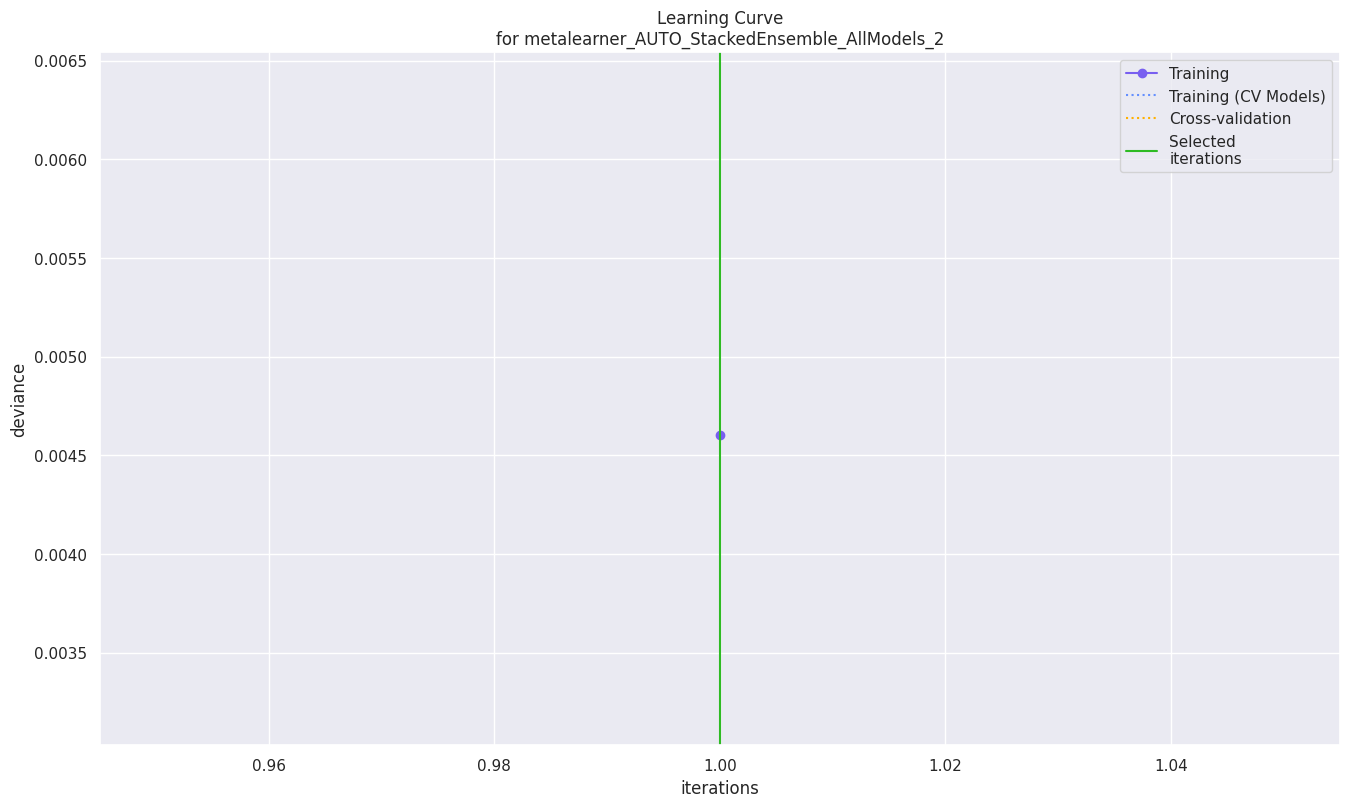

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

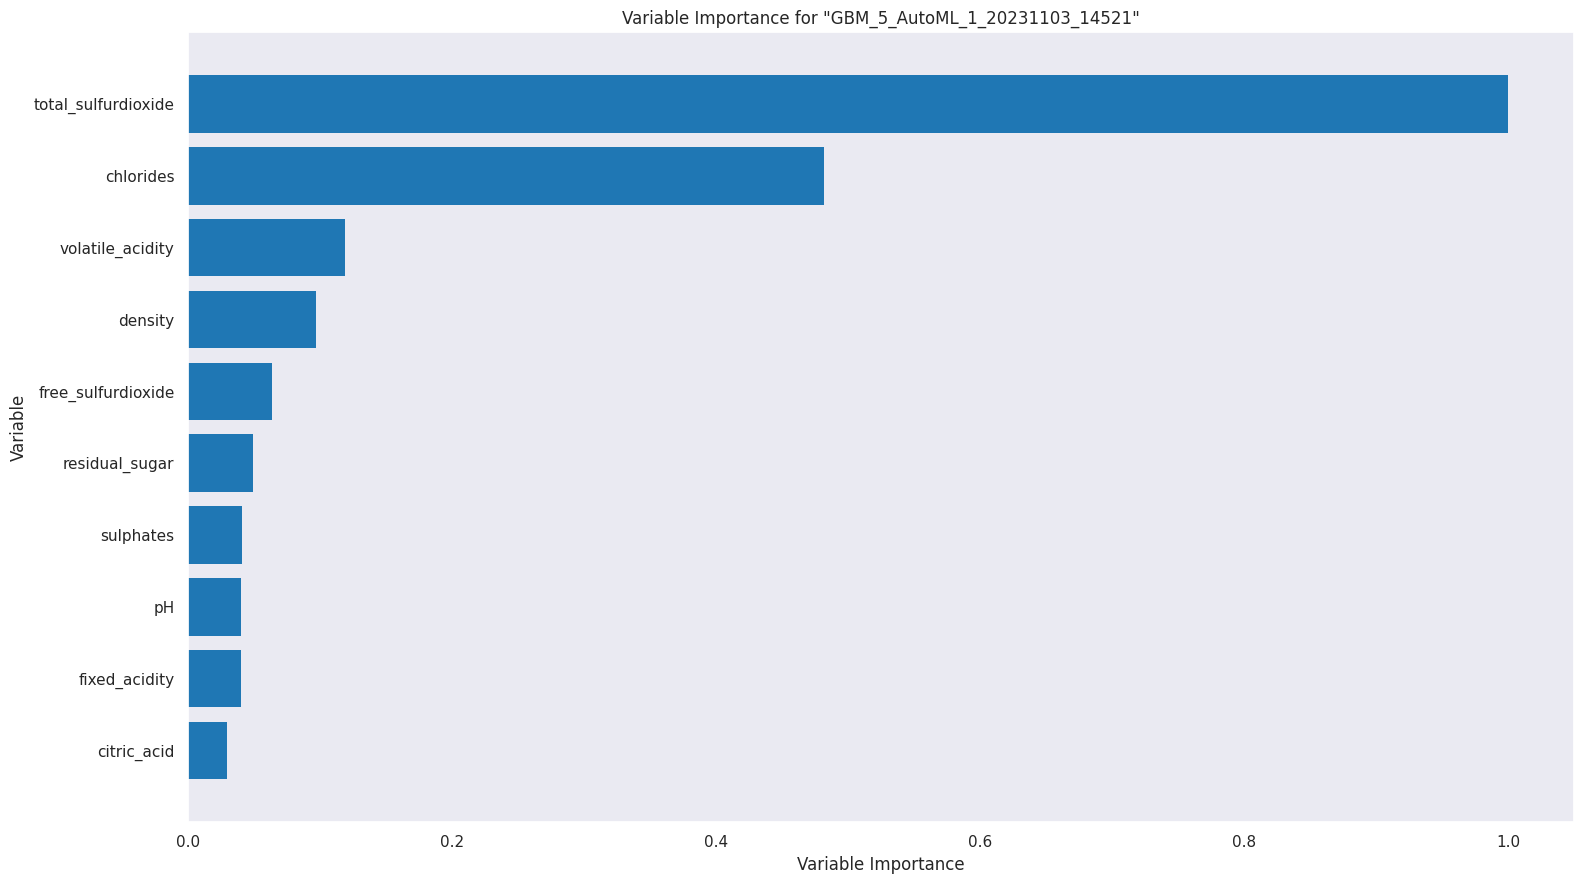

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

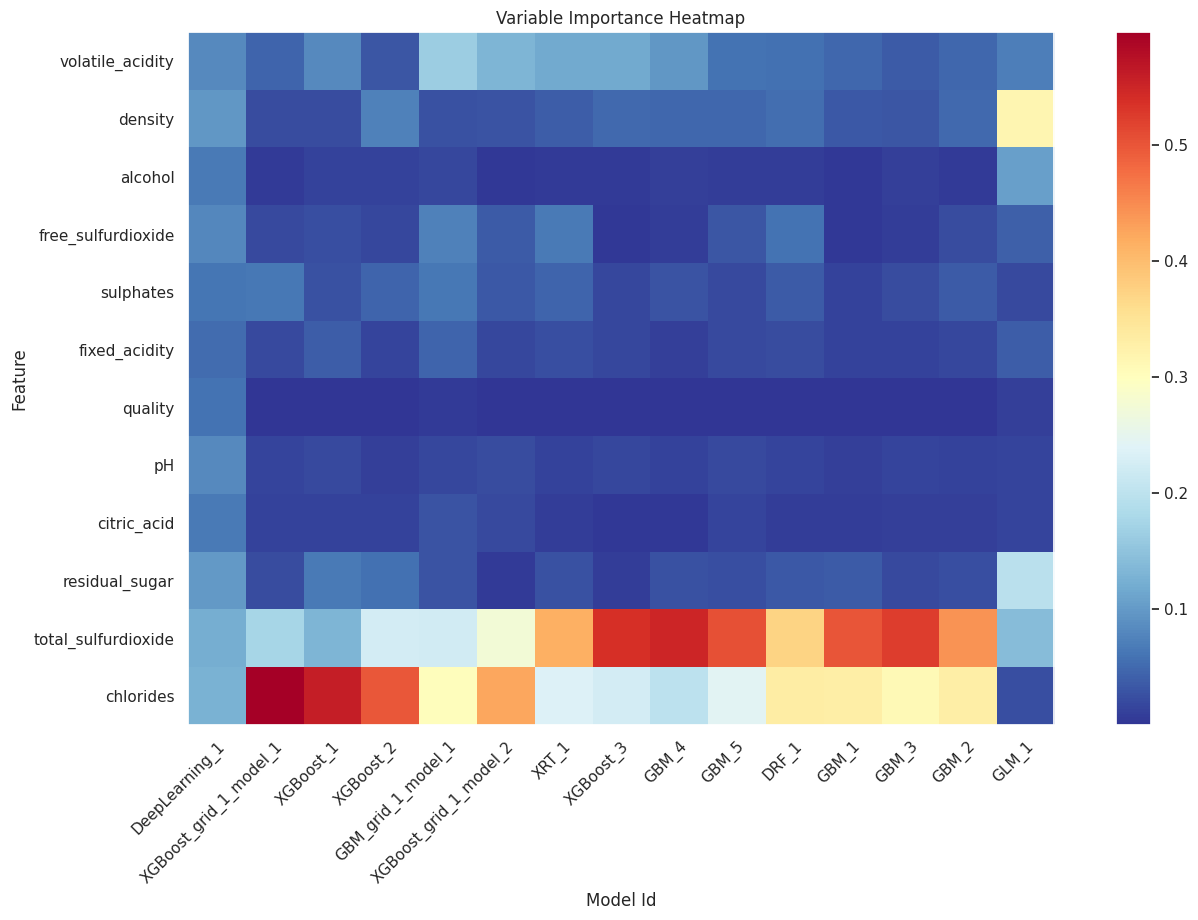

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

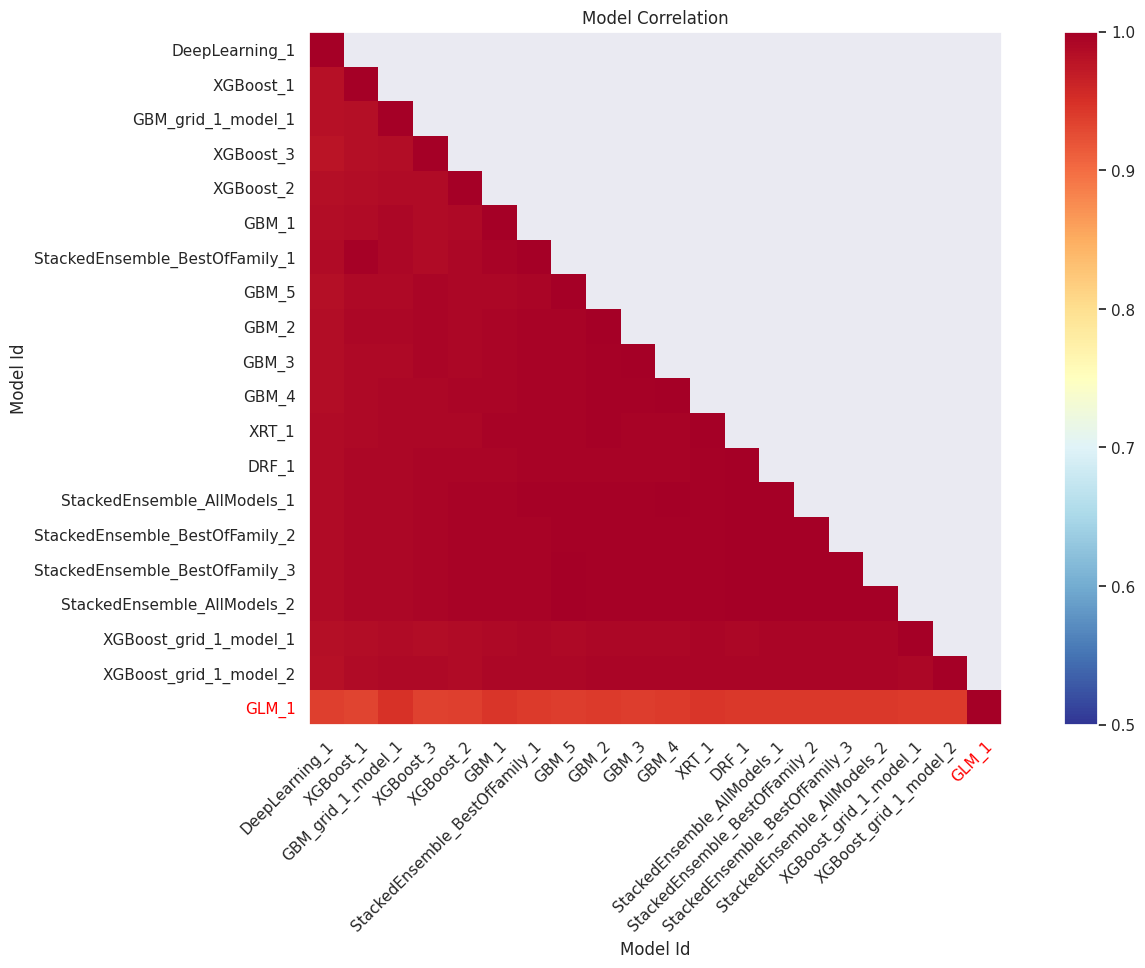

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

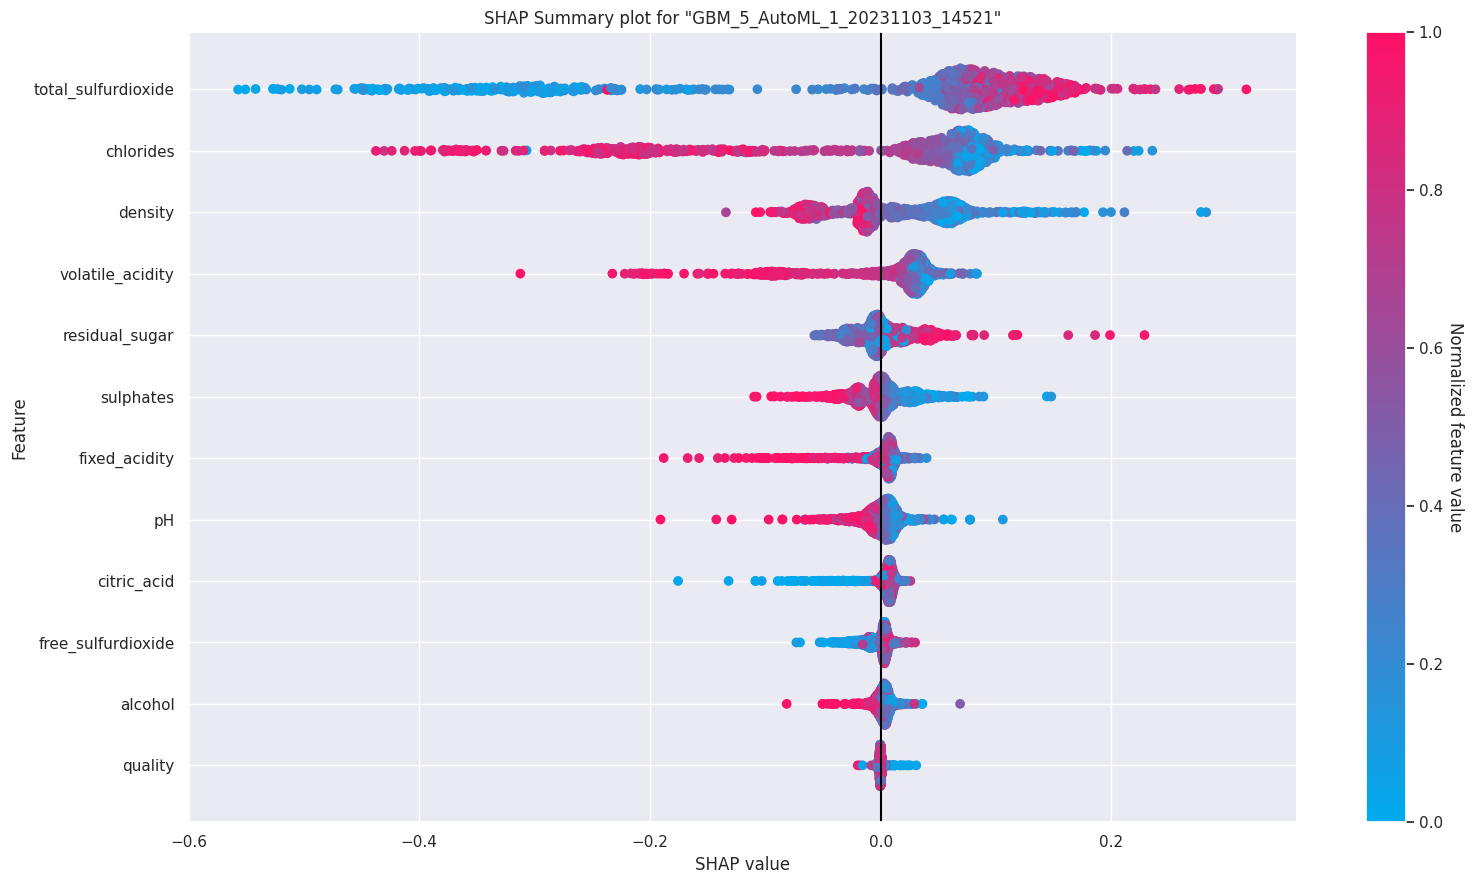

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

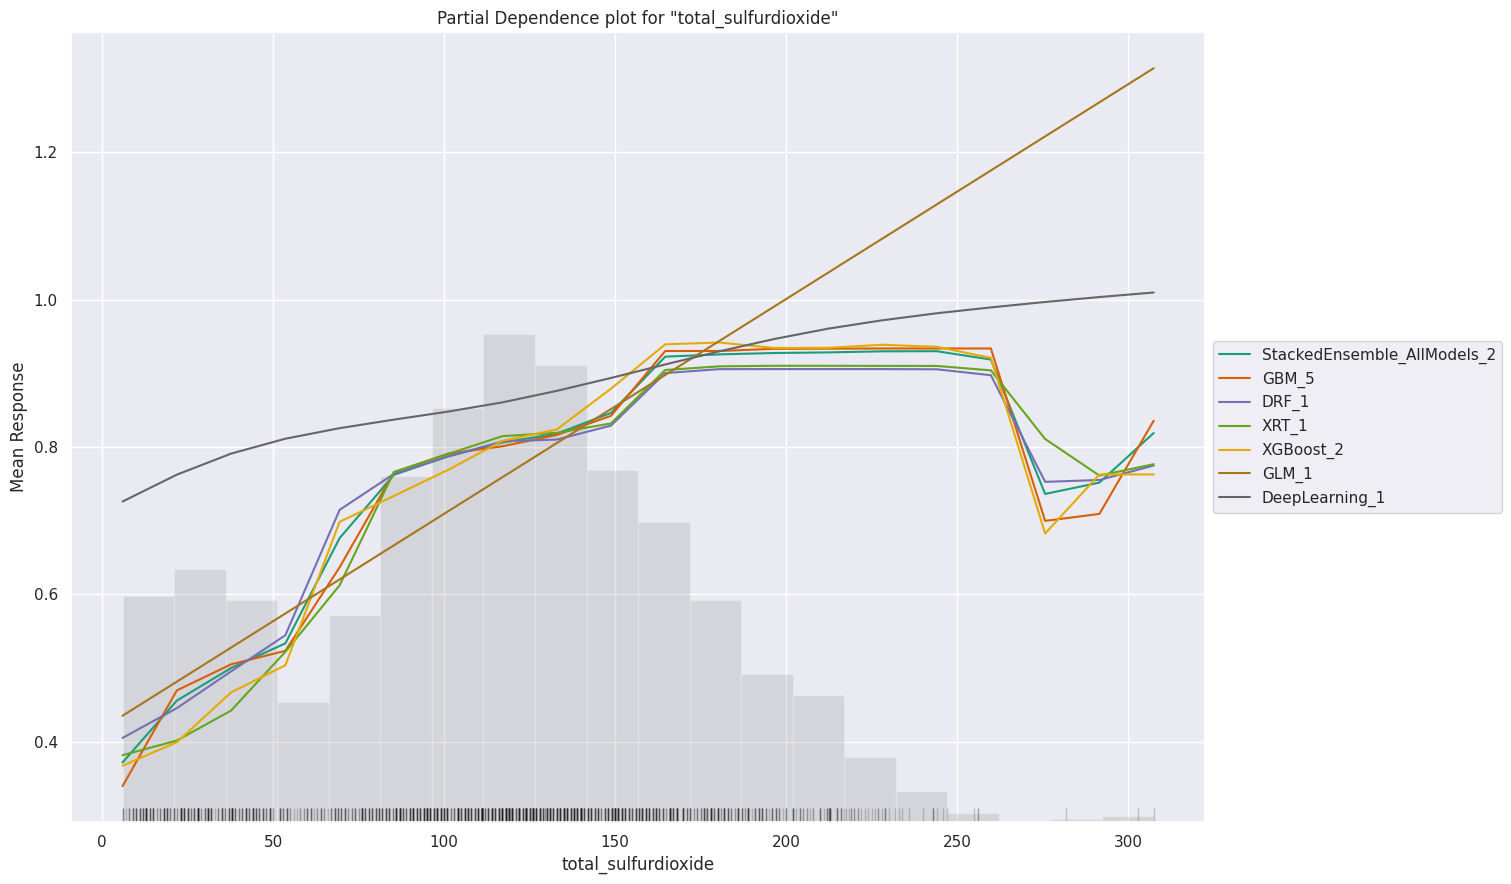

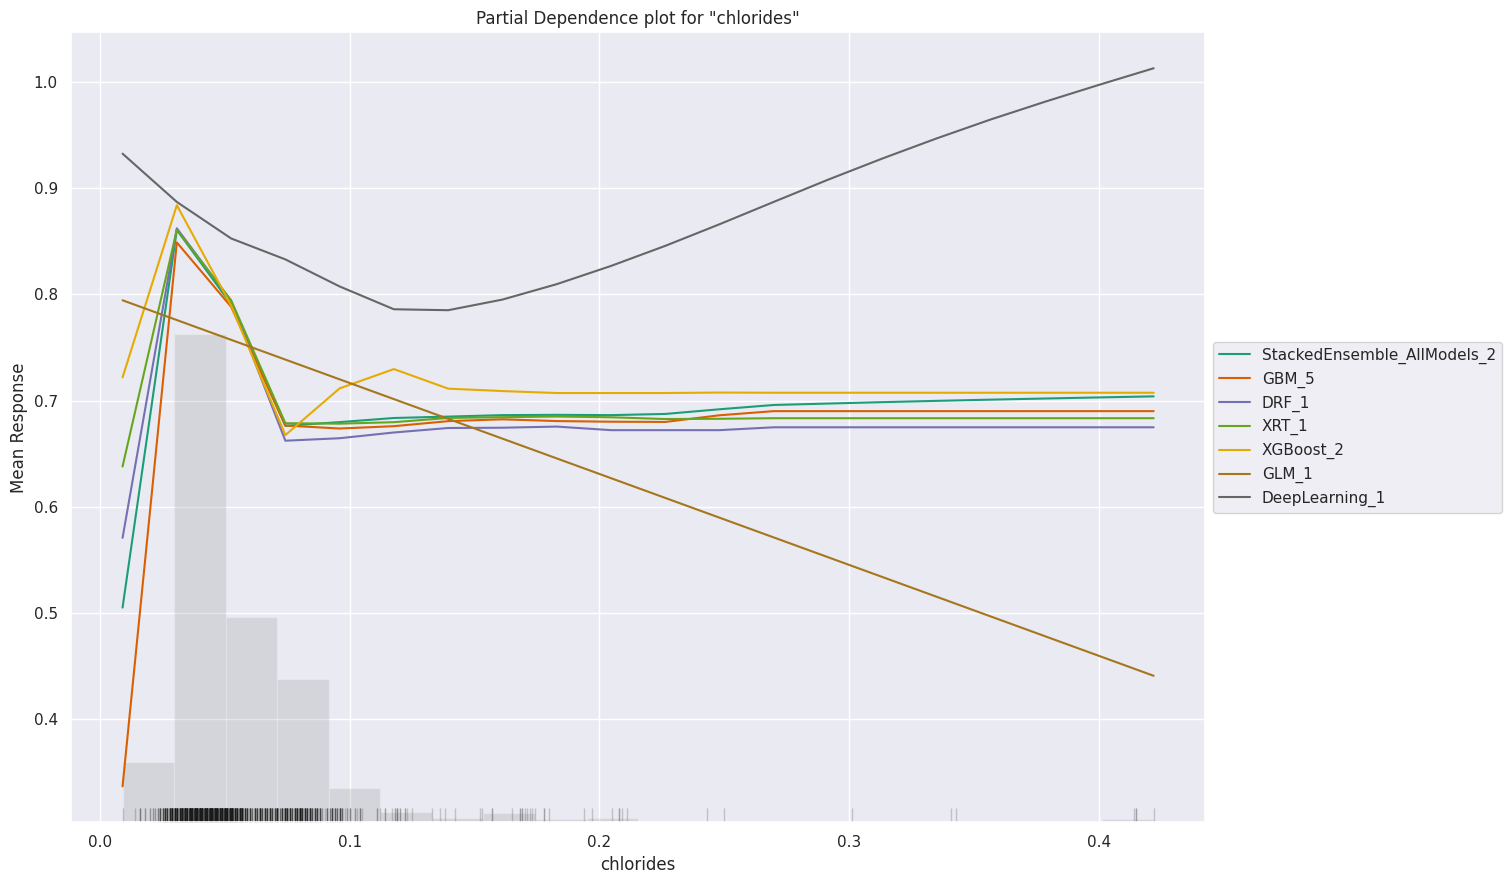

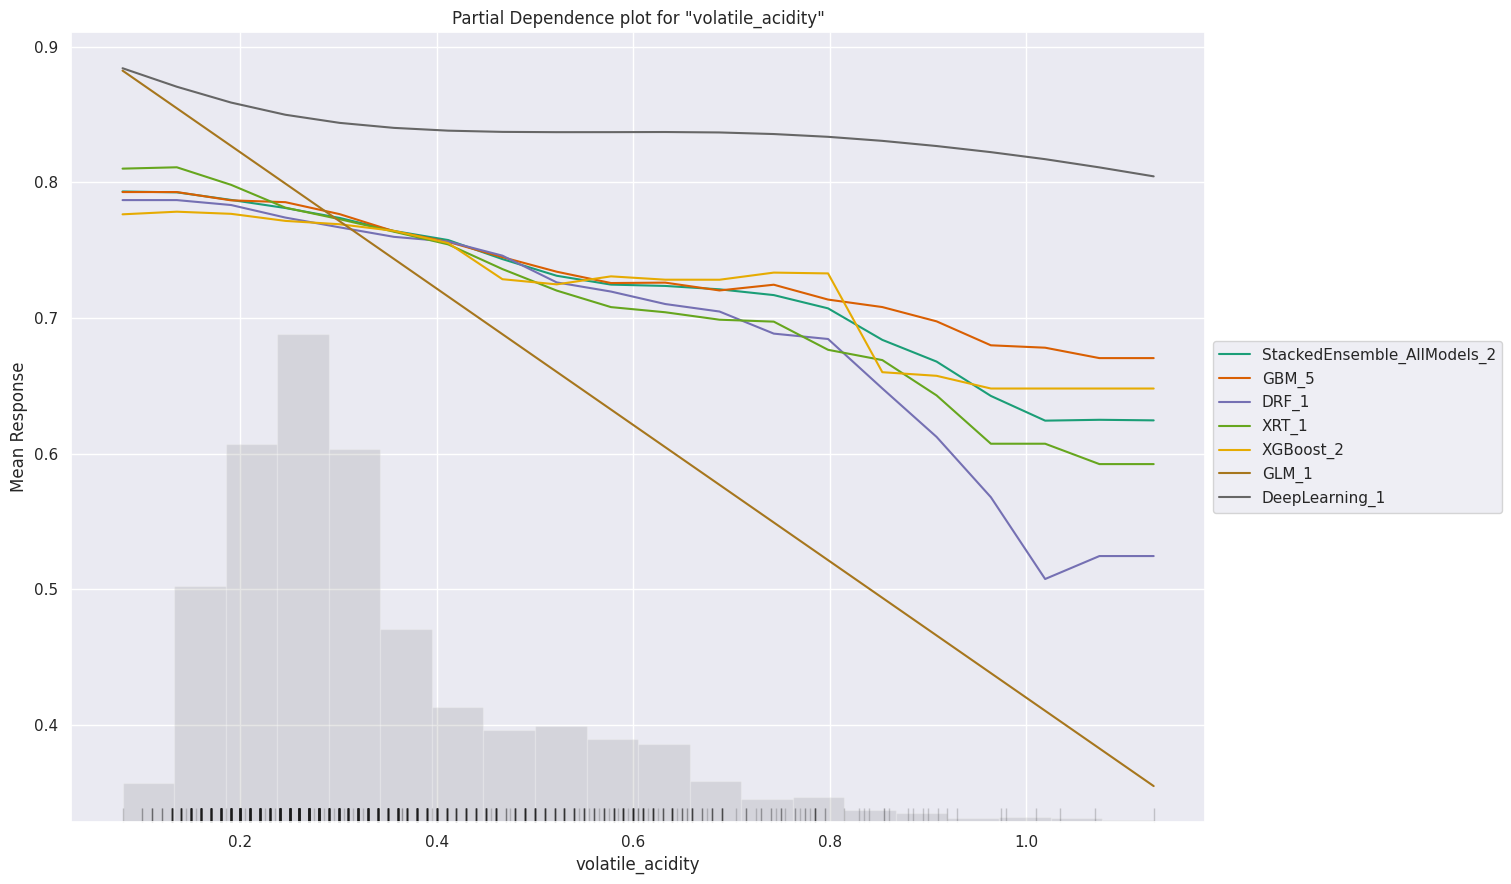

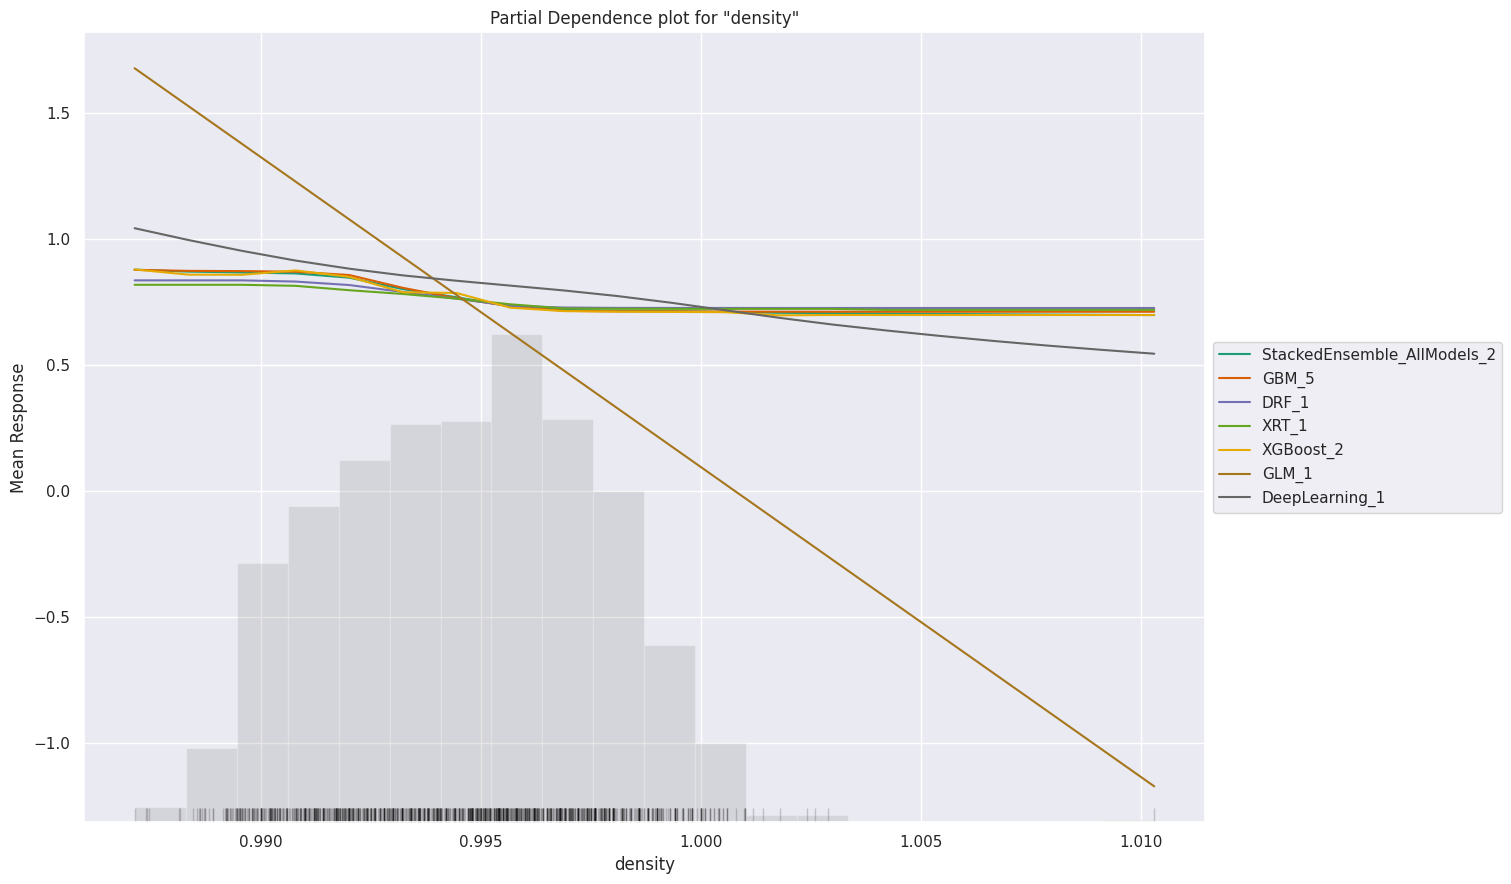

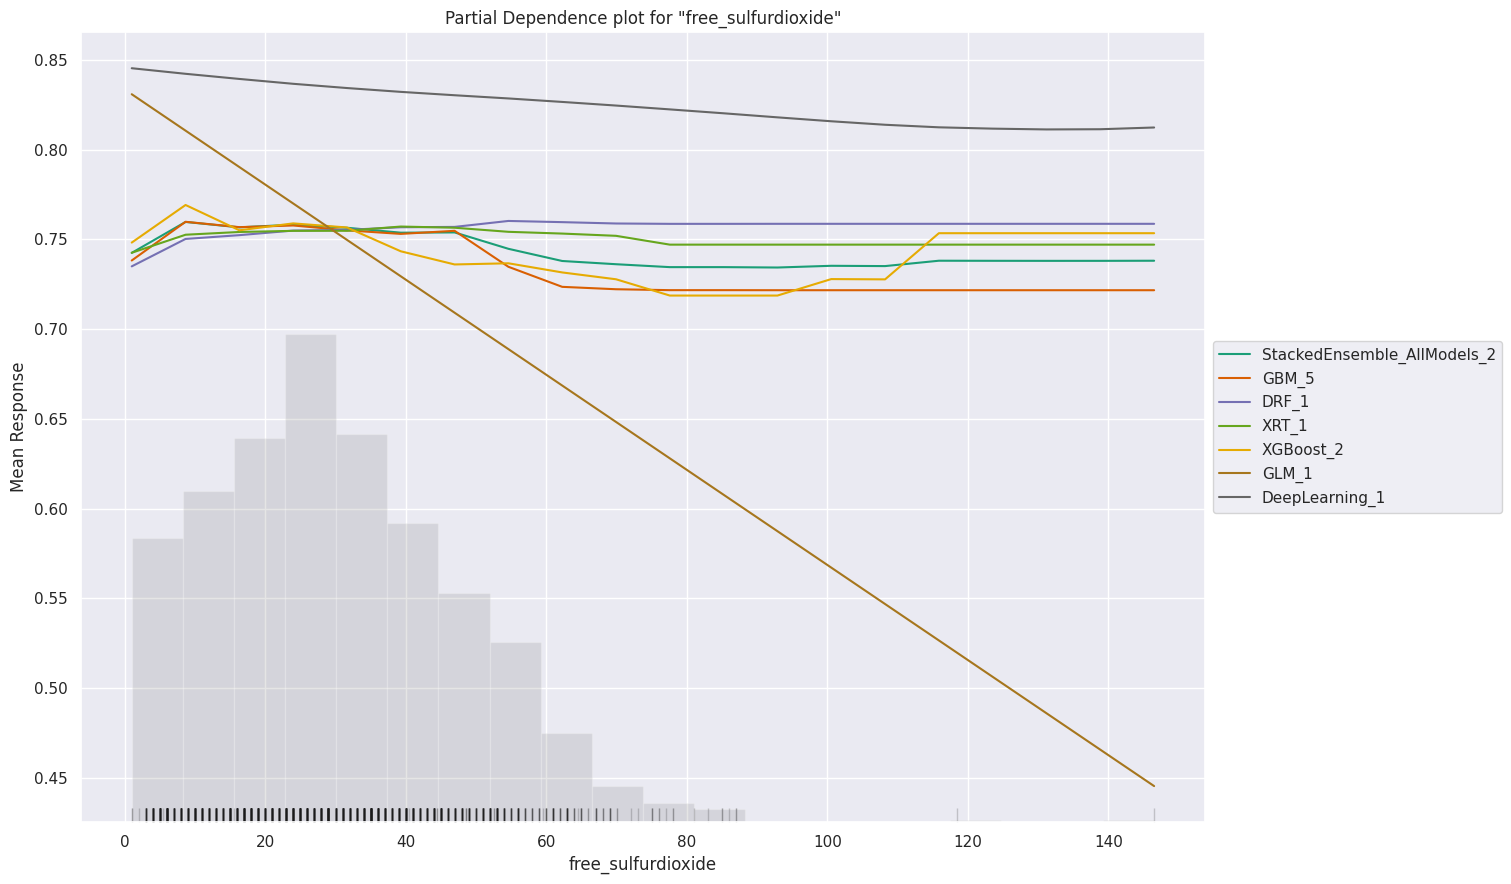

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

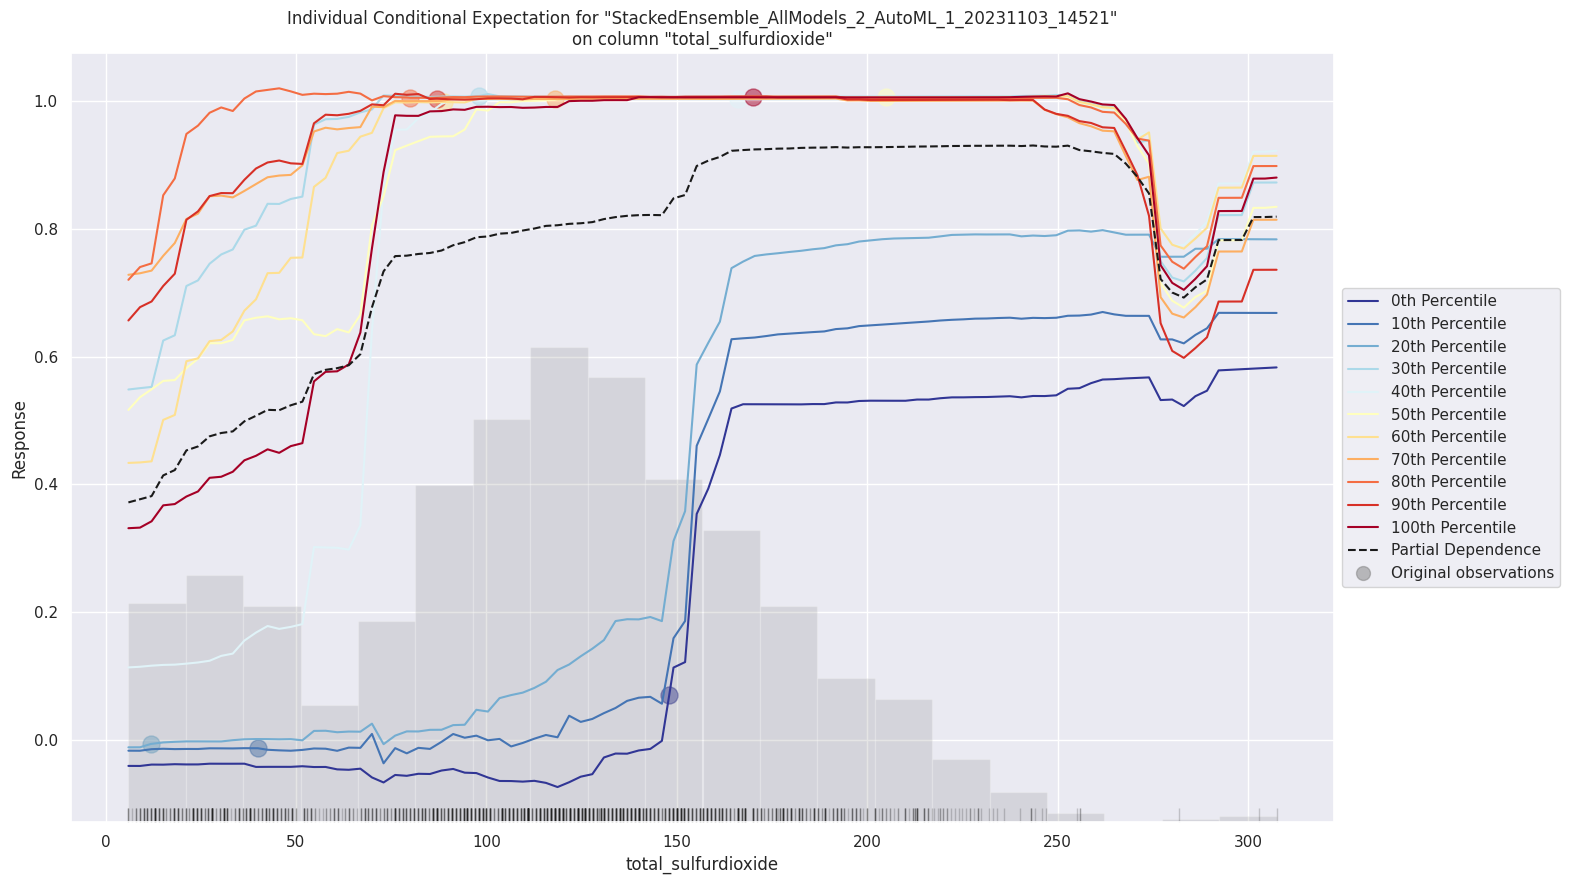

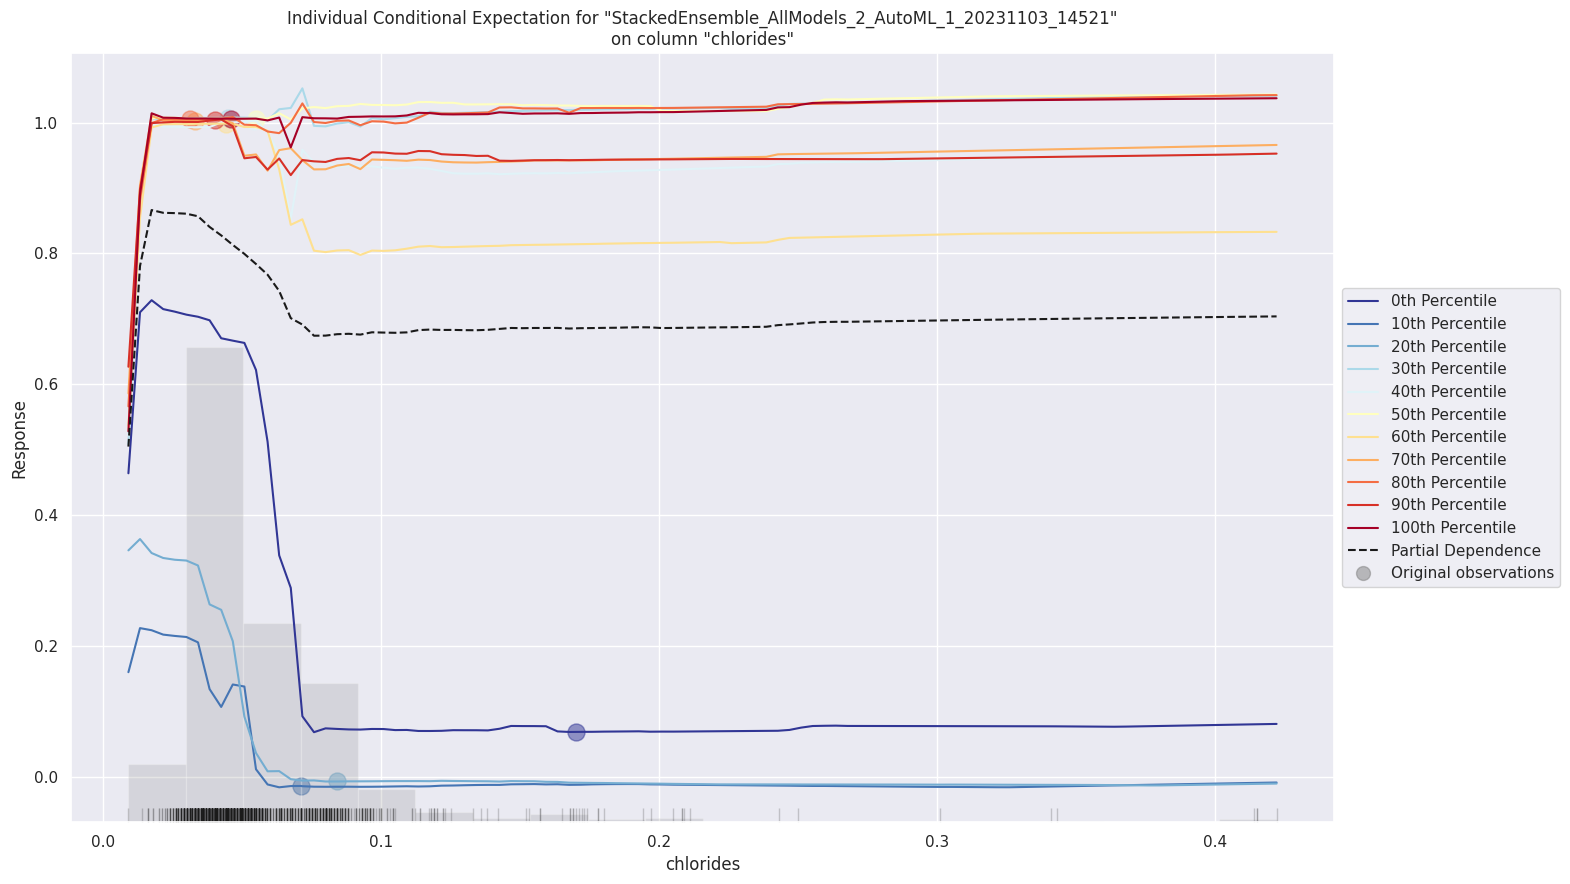

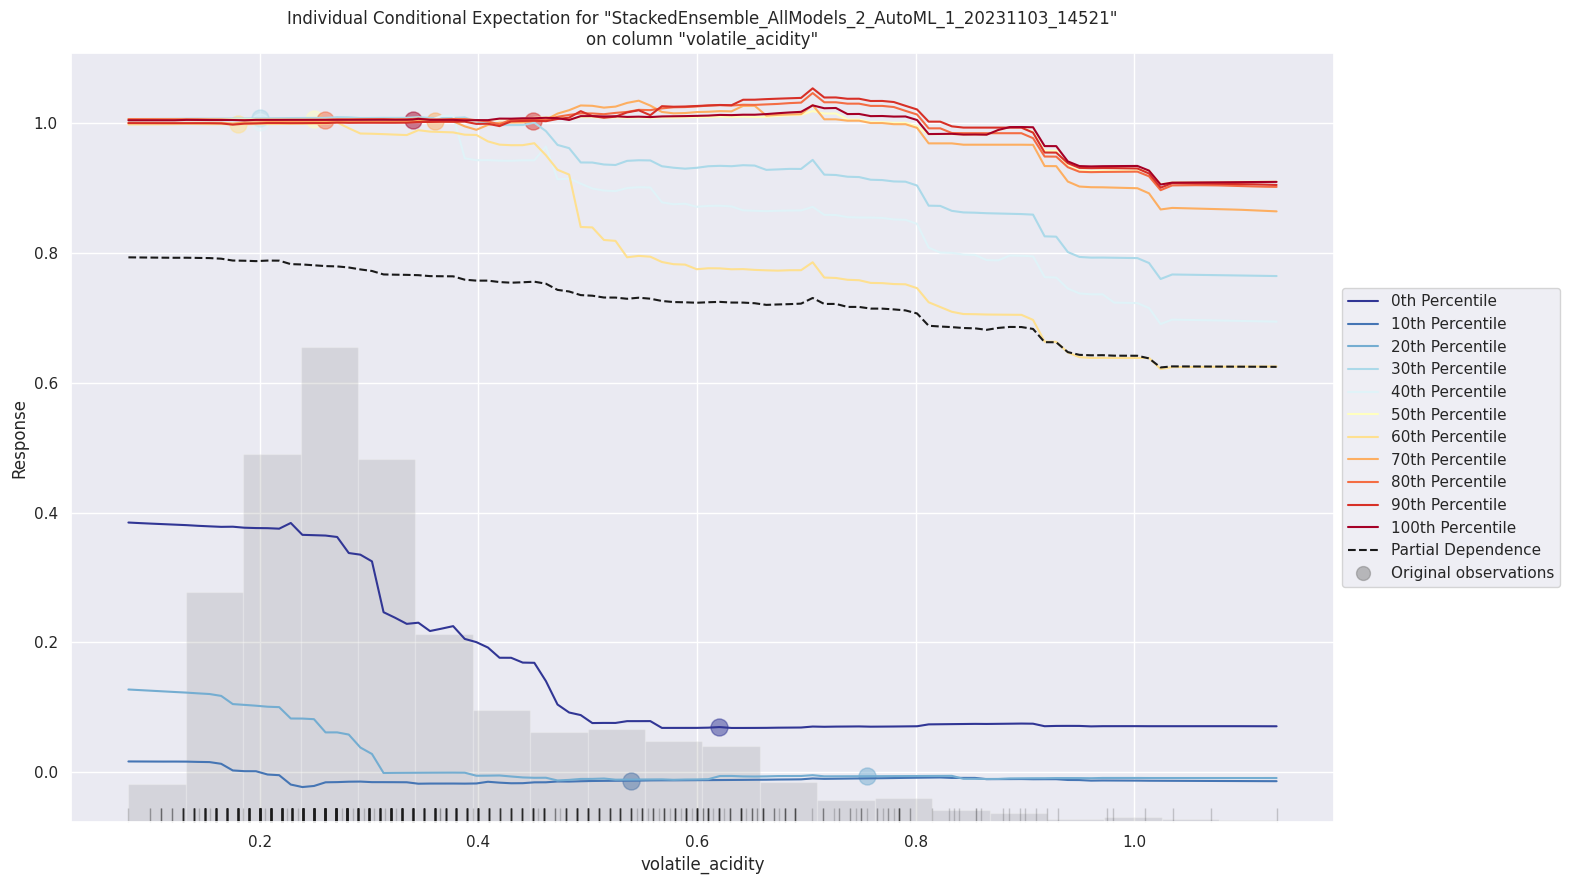

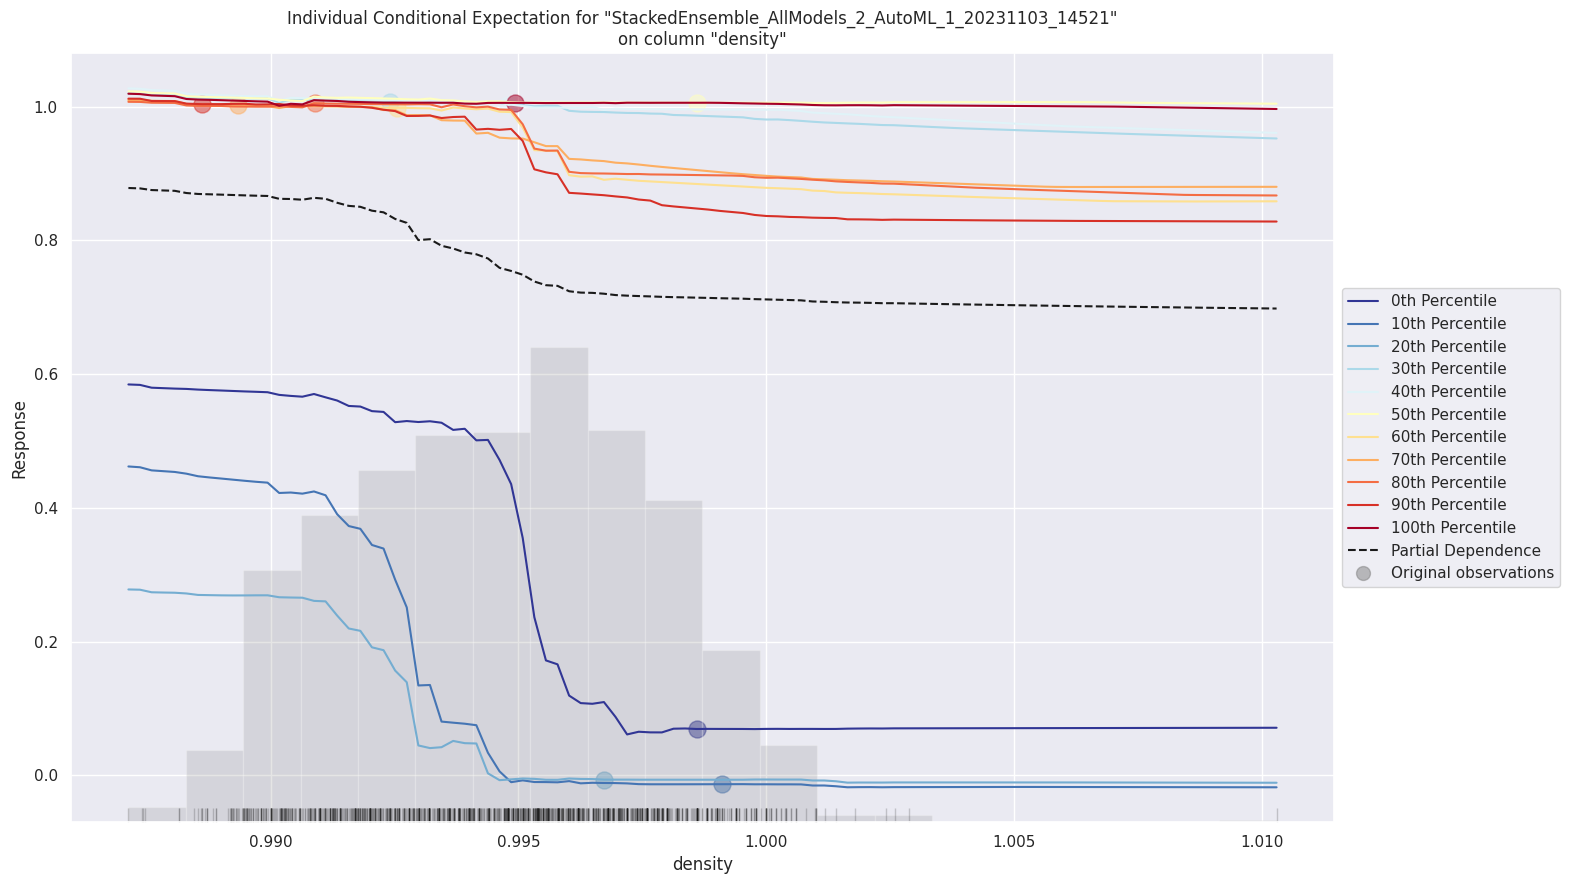

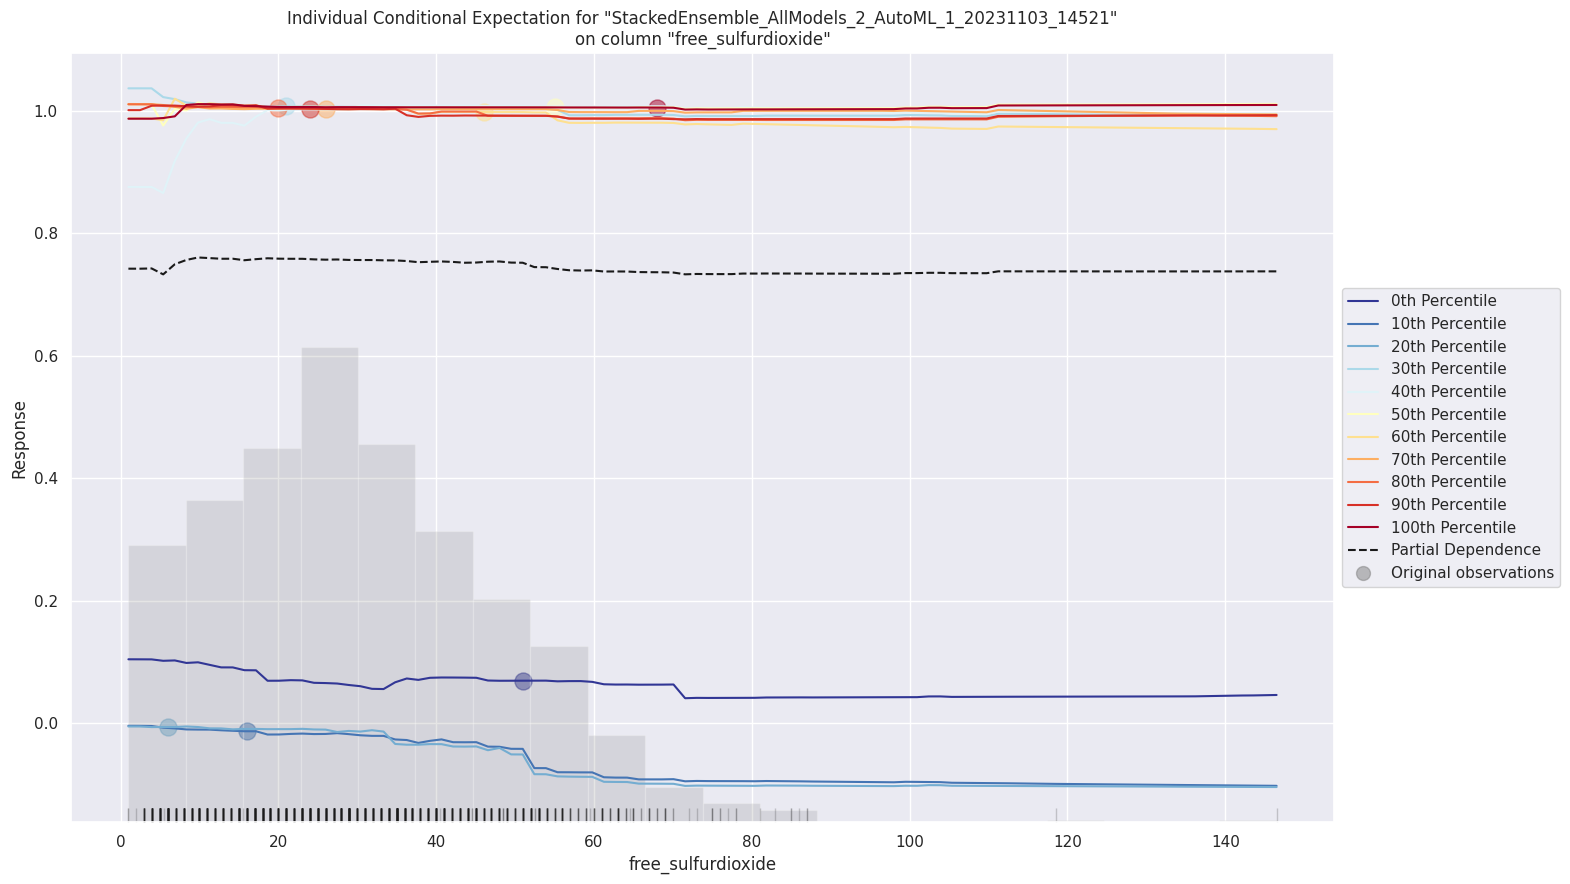

In [392]:
exa = aml.explain(df_test)

# Interpreting Best Model from AutoML

 **Residual Analysis**

* Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.

**SHAP Summary**

From the SHAP summary diagram, we can interpret a few conclusions -

1. All the features are listed as per their importance in making the prediction, that is alcohol is more significant followed by volatile_acidity, and so on. Hence, free_sulphur_dioxide is the least significant predictor in our model.
2. The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see Alcohol has the most impact on the quality of the wine. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - Hight amount of alcohol results in high quality of wine, a low amount of volatile acidity results in high quality of wine, and so on. As we can see the distribution of red points in the Alcohol feature is far more spread than the blue points. From this visual, we can interpret that the quality of wine vastly increases as the amount of alcohol increases. It doesn't have much impact if the content is low i.e. between the shap value of 0.4 to 0.6 the blue data points are pretty concentrated. Inversely for the Volatile Acidity, less is better for the quality of the wine. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect on the quality of the wine.


The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

# Partial Dependence Plot (PDP)


A partial dependence plot shows the marginal effect of a feature on the target(wine quality in our dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP.

For Interpretation purposes, let us pick up the two most important variables - Alcohol and Sulphate.

1. As we can see that when the rest of the variables are kept constant and a
marginal change is made in alcohol, we can see the mean response increases between alcohol levels of 11 and 12. This could be interpreted as this range of alcohol could be the deciding factor in the quality of the wine. 2. Similarly when the rest of the variables are kept constant and a marginal change is made in sulfate we can observe the mean response of quality going up between the sulfate range of 0.4 to 0.8. Hence, it can be interpreted that this range is deciding factor in the quality of the wine.

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.

# ICE (Individual Conditional Expectation) Plot
ICE plot is similar to what we did in the PDP plot, but the fundamental difference between the two methods is that the PDP plot focuses on the average effect of a feature and does not focus on a specific instance. ICE plot comes in rescue to address this drawback of the PDP plot where the outputs from all instances are considered instead of an average value.

Let us go back to the alcohol and sulfate features, as we interpreted in PDP the quality of wine increases when alcohol and sulfate value is between 11 to 12 and 0.4 to 0.8 respectively. But is this true for every wine in the dataset? ICE plot has an answer to this question. As we can see in the ICE plot above the quality of a few wines(0th percentile instance) increases a lot in this range while the quality of a few doesn't change much(100th Percentile Instance).

Individual conditional expectation curves are even more intuitive to understand than partial dependence plots. One line represents the predictions for one instance if we vary the feature of interest.

In [393]:
import statsmodels.formula.api as smf  # OLS model Library

In [394]:
import h2o

pandas_df = h2o.as_list(df)
# pandas_df.columns
# pandas_df = pandas_df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'Volatile_acidity', 'citric acid': 'citric_acid' ,'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfurdioxide', 'total sulfur dioxide': 'total_sulfurdioxide'})


In [395]:
pandas_df

,is_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfurdioxide,total_sulfurdioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [397]:
import statsmodels.api as sm

model = smf.ols("is_type ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfurdioxide + total_sulfurdioxide + density + pH + sulphates + alcohol + quality", data=pandas_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                is_type   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     3385.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:53:21   Log-Likelihood:                 2695.0
No. Observations:                6497   AIC:                            -5364.
Df Residuals:                    6484   BIC:                            -5276.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             136.5609      2.582     52.895      0.000     131.500     141.622
fixed_acidity           0.0493      0.003     14.578      0.000       0.043       0.056
volatile_acidity       -0.4768      0.017    -27.708      0.000      -0.511      -0.443
citric_acid             0.1291      0.017      7.452      0.000       0.095       0.163
residual_sugar          0.0530      0.001     47.138      0.000       0.051       0.055
chlorides              -0.7681      0.072    -10.615      0.000      -0.910      -0.626
free_sulfurdioxide     -0.0028      0.000    -16.823      0.000      -0.003      -0.002
total_sulfurdioxide     0.0029   6.06e-05     48.598      0.000       0.003       0.003
density              -136.4162      2.634    -51.787      0.000    -141.580    -131.252
pH                      0.1711      0.020      8.712      0.000       0.133       0.210
sulphates              -0.1157      0.017     -6.937      0.000      -0.148      -0.083
alcohol                -0.1182      0.004    -31.959      0.000      -0.125      -0.111
quality                -0.0172      0.003     -6.361      0.000      -0.022      -0.012
==============================================================================
Omnibus:                     2393.234   Durbin-Watson:                   1.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           263331.658
Skew:                           0.771   Prob(JB):                         0.00
Kurtosis:                      34.151   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Assumptions
*  Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. Here no heteroscadasticity is observed in the residual plot, hence this assumption is not violated.
* Here the Durbin- Watson value is 1.780, which signifies that there is no autocorrelation in our data, hence this assumption is also not violated.
* If we look at the Correlation Heatmap closely - we can see that there is little to no collinearity among the variables.
* If we look closely at the Pair-Plot - we can notice that every independent variable has linear relationship with the target variable.
* Based on the distributions I described earlier, it is possible that some of the variables violate the assumption of normality. For example, volatile acidity, residual sugar, and total sulfur dioxide all have positively skewed distributions, which could lead to non-normality of the residuals in a linear regression model.
# Interpreting Regression Co-efficients
***Model Co-efficients***

The positive or negative value of a co-eficient tells us if there is a positve or a negtive correlationship between the target and predictors. A positive value indicates that the value of target increases if the value of co-efficient increases and vice-versa. Whereas the negative values indicates that the value of target increases if the value of co-efficient decreases and vice versa.

High absolute values of co-efficients can be used to get an idea of the importance of variables in a linear regression. Here, as stated above Alcohol and Sulphates seems to be the most important variables to predict target i.e. Quality of Wine.

Also, it signifies that Higher the qualtity of Alcohol and sulphates - better is the quality of Wine.

P-Values

If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant

* volatile_acidity
* chlorides
* total_sulfur_dioxide
* alcohol
* sulphate

These variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target (Wine Quality).

**Skew and Kurtosis**

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as -0.143, 3.717 respectively.

**Durbin-Watson**

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

* Value of 2 indicates that no auto correlation is detected
* Value between 0 to 2 indicates that there is positive auto correlation detected
* Value between 2 to 4 indicates that there is negatibe auto correlation detected
Our model has a DW score of 1.780 which could be interpreted as a positive auto-correlation in the residuals of regression.

**Jarque-Bera Test**

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 28.421 which again re-inforces the interpretation we got from Skew and Kurtosis.

Hyperparameter Tuning - Random Grid Search on GBM Model

In [398]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [399]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [400]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [401]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [402]:
train

is_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfurdioxide,total_sulfurdioxide,density,pH,sulphates,alcohol,quality
1,7,0.25,0.45,2.3,0.045,40,118,0.99064,3.16,0.48,11.9,7
1,7.6,0.14,0.74,1.6,0.04,27,103,0.9916,3.07,0.4,10.8,7
1,6.2,0.15,0.27,11,0.035,46,116,0.99602,3.12,0.38,9.1,6
1,6.7,0.16,0.32,12.5,0.035,18,156,0.99666,2.88,0.36,9,6
1,6.8,0.27,0.22,17.8,0.034,16,116,0.9989,3.07,0.53,9.2,5
1,7.3,0.42,0.38,6.8,0.045,29,122,0.9925,3.19,0.37,12.6,7
1,7.8,0.39,0.26,9.9,0.059,33,181,0.9955,3.04,0.42,10.9,6
0,7.1,0.65,0.18,1.8,0.07,13,40,0.997,3.44,0.6,9.1,5
1,5.9,0.37,0.1,1.6,0.057,39,128,0.9924,3.24,0.48,10.1,5
0,9.3,0.49,0.36,1.7,0.081,3,14,0.99702,3.27,0.78,10.9,6


In [403]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,0.0037167
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,0.0042153
,0.5,0.05,7.0,0.9,gbm_grid2_model_2,0.0042159
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,0.0042589
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,0.0042935
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,0.0047492
,0.7000000,0.06,5.0,0.6000000,gbm_grid2_model_14,0.0048903
,0.8,0.03,9.0,0.9,gbm_grid2_model_8,0.0049620
,0.9,0.1,4.0,0.7000000,gbm_grid2_model_15,0.0050638
,0.3000000,0.03,8.0,1.0,gbm_grid2_model_5,0.0051824


In [404]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)
gbm_gridperf2

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,0.0037167
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,0.0042153
,0.5,0.05,7.0,0.9,gbm_grid2_model_2,0.0042159
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,0.0042589
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,0.0042935
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,0.0047492
,0.7000000,0.06,5.0,0.6000000,gbm_grid2_model_14,0.0048903
,0.8,0.03,9.0,0.9,gbm_grid2_model_8,0.0049620
,0.9,0.1,4.0,0.7000000,gbm_grid2_model_15,0.0050638
,0.3000000,0.03,8.0,1.0,gbm_grid2_model_5,0.0051824


In [405]:
gbm_gridperf2

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,0.0037167
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,0.0042153
,0.5,0.05,7.0,0.9,gbm_grid2_model_2,0.0042159
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,0.0042589
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,0.0042935
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,0.0047492
,0.7000000,0.06,5.0,0.6000000,gbm_grid2_model_14,0.0048903
,0.8,0.03,9.0,0.9,gbm_grid2_model_8,0.0049620
,0.9,0.1,4.0,0.7000000,gbm_grid2_model_15,0.0050638
,0.3000000,0.03,8.0,1.0,gbm_grid2_model_5,0.0051824


In [406]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [407]:
models = gbm_gridperf2.models

In [408]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [409]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [410]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [411]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.5        0.10          9          1.0           0.003717
1               0.9        0.09          8          0.9           0.004215
2               0.5        0.05          7          0.9           0.004216
3               0.8        0.06          9          0.6           0.004259
4               0.9        0.09          9          0.6           0.004293
5               0.4        0.08          6          0.9           0.004749
6               0.7        0.06          5          0.6           0.004890
7               0.8        0.03          9          0.9           0.004962
8               0.9        0.10          4          0.7           0.005064
9               0.3        0.03          8          1.0           0.005182
10              0.9        0.07          4          0.9           0.005244
11              0.7        0.03          6          1.0           0.005284
12              0.5      

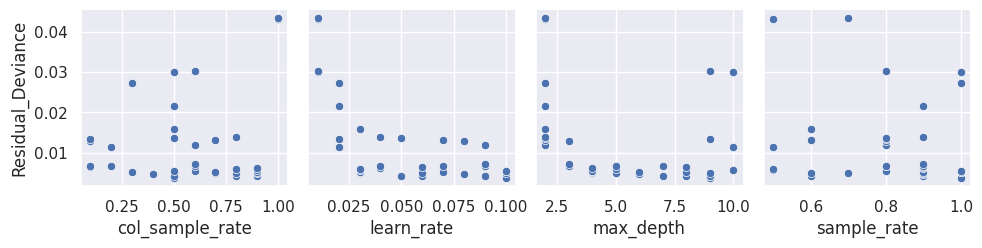

In [412]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# Hyperparameter Tuning Analysis
This is a summary of hyperparameter tuning for an XGBoost model, which involved a grid search over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. The search resulted in a total of 36 combinations of hyperparameters, and for each combination, the Residual Deviance was calculated as an evaluation metric.

Based on the results, the hyperparameter combination with the lowest Residual Deviance was a model with col_sample_rate of 0.3, learn_rate of 0.03, max_depth of 8, and sample_rate of 1.0, with a Residual Deviance of 0.354805. The next best models had Residual Deviances in the range of 0.36-0.39, while the worst-performing models had Residual Deviances above 0.43.

Overall, the results suggest that the combination of col_sample_rate, learn_rate, max_depth, and sample_rate can have a significant impact on the performance of an XGBoost model, and that hyperparameter tuning can lead to significant improvements in model performance.

Conclusion

* Built a predictive model using H2O AutoML to predict the quality of wine using certain attributes.
* Studied the effects of Ridge and LASSO regularization on the GLM Model.
* Studied the importance of variable using SHAP summary.
* Performed the hyperparameterb tuning using Random Grid Search Method.

References

* https://rstudio-pubs-static.s3.amazonaws.com/64286_2635bf8b05fb4423ac2968243211b46b.html
* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
* https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e
* https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb

License
MIT License

Copyright (c) 2023 Sampada Kasture

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.